Notebook contains resources that creates:
- Activation blocks
- Layers
- Loss functions
- Backpropagation



In [1]:
import pandas as pd
import numpy as np
mnist_train=pd.read_csv("data/mnist_train.csv")
mnist_test=pd.read_csv("data/mnist_test.csv")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
### Create a logic for a single neuron ###
def neuron(input_dim):
    w=np.random.randn(input_dim,)
    return w
def add_layer(input_dim,n_neurons):
    w=np.array([neuron(input_dim) for i in range(n_neurons)]).T/np.sqrt(input_dim)
    b=np.random.randn(n_neurons)
    params={'w':w,'b':b}
    return params

In [5]:
add_layer(784,3)

{'w': array([[-0.02015479,  0.04739716, -0.00789633],
        [-0.01070049,  0.0188251 , -0.01124535],
        [-0.02072467, -0.02967015,  0.01561102],
        ...,
        [-0.01143469,  0.03475735,  0.01146492],
        [ 0.02924725, -0.0235802 ,  0.02585594],
        [-0.0545071 ,  0.05891627, -0.04368616]]),
 'b': array([-0.7249541 ,  1.31861671,  0.18697602])}

In [6]:
##### Create a NN class in which layers can be added ######
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        params={'w':w,'b':b}
        return params
    def add_layer(self,n):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n))
    def summary(self):
        result={}
        for i,layer in enumerate(self.layers):
            result[f'layer_{i+1}_dim']=layer['w'].shape
        print(result)

In [7]:
model=MLP(784)

In [8]:
model.add_layer(n=3)

In [9]:
model.summary()

{'layer_1_dim': (784, 3)}


In [10]:
model.add_layer(n=10)

In [11]:
model.summary()

{'layer_1_dim': (784, 3), 'layer_2_dim': (3, 10)}


In [12]:
###### We can now extend the class to include activation functions #####
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
        self.activations=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n,activation):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        if activation not in ["sigmoid",'softmax']:
            raise Exception("Activation can only be one of sigmoid or softmax")
        params={'w':w,'b':b,'activation':activation}
        return params
    def add_layer(self,n,activation):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n,activation))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n,activation))
    def __repr__(self):
        mesg=""
        for i,layer in enumerate(self.layers):
            mesg+=f"Layer_{i}_dim_{layer['w'].shape}_activation_{layer['activation']}\n"
        return mesg
    def sigmoid(self,z):
        activation=1/(1+np.exp(-z))
        return activation
    def softmax(self,z):
        activation=np.exp(z)/np.exp(z).sum(axis=1,keepdims=True)
        return activation

In [13]:
model=MLP(784)

In [14]:
model.add_layer(n=30,activation='sigmoid')

In [15]:
model.add_layer(n=10,activation='softmax')

In [16]:
print(model)

Layer_0_dim_(784, 30)_activation_sigmoid
Layer_1_dim_(30, 10)_activation_softmax



In [17]:
### Add a forward method to compute forward pass ###
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
        self.activations=[]
        self.z=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n,activation):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        if activation not in ["sigmoid",'softmax']:
            raise Exception("Activation can only be one of sigmoid or softmax")
        params={'w':w,'b':b,'activation':activation}
        return params
    def add_layer(self,n,activation):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n,activation))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n,activation))
    def __repr__(self):
        mesg=""
        for i,layer in enumerate(self.layers):
            mesg+=f"Layer_{i}_dim_{layer['w'].shape}_activation_{layer['activation']}\n"
        return mesg
    def sigmoid(self,z):
        activation=1/(1+np.exp(-z))
        return activation
    def softmax(self,z): #http://cs231n.github.io/linear-classify (Numerical Stability)
        e_z=np.exp(z-np.max(z))
        activation=e_z/e_z.sum(axis=1,keepdims=True)
        return activation
    def forward(self,batch):
        acts={'sigmoid':self.sigmoid,'softmax':self.softmax}
        for layer in self.layers:
            batch=np.matmul(batch,layer['w'])+layer['b']
            self.z.append(batch)
            batch=acts[layer['activation']](batch)
            self.activations.append(batch)
        return batch           

In [18]:
b=mnist_train.drop('label',axis=1).iloc[0:2].values

In [19]:
b.shape

(2, 784)

In [20]:
mod=MLP(input_dim=784)

In [21]:
mod.add_layer(n=3,activation='sigmoid')
mod.add_layer(n=10,activation='softmax')

In [22]:
mod.forward(b)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


array([[0.07035572, 0.07653144, 0.09745779, 0.1129298 , 0.17634166,
        0.26577368, 0.01947976, 0.02616382, 0.01991103, 0.13505531],
       [0.05323029, 0.06180453, 0.06562115, 0.06042874, 0.12239684,
        0.40267844, 0.04837833, 0.08527981, 0.0539124 , 0.04626947]])

In [23]:
mod.activations

[array([[1.45292141e-290, 0.00000000e+000, 1.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 1.58340404e-002]]),
 array([[0.07035572, 0.07653144, 0.09745779, 0.1129298 , 0.17634166,
         0.26577368, 0.01947976, 0.02616382, 0.01991103, 0.13505531],
        [0.05323029, 0.06180453, 0.06562115, 0.06042874, 0.12239684,
         0.40267844, 0.04837833, 0.08527981, 0.0539124 , 0.04626947]])]

In [24]:
mod.z

[array([[ -667.37610067, -2475.86088037,   994.64379967],
        [-2677.10683166, -1387.14432026,    -4.12963246]]),
 array([[ 0.06426837,  0.14840596,  0.39012362,  0.53747062,  0.98312762,
          1.3933494 , -1.21991978, -0.92491831, -1.19802207,  0.7163887 ],
        [-0.13852088,  0.01082807,  0.07074961, -0.01168374,  0.69412005,
          1.88498981, -0.23409648,  0.33278921, -0.12578794, -0.27866626]])]

In [25]:
##### Include a cost computation mechanism #####
def ce_loss(softmax,y):
    loss=-np.log(softmax[range(y.shape[0]),y])
    loss=np.sum(loss)/y.shape[0]
    return loss

In [26]:
ce_loss(mod.forward(b),np.array([0,1]))

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


2.7189849404518265

Backprop Equations: http://neuralnetworksanddeeplearning.com/chap2.html

Implimentation: http://cs231n.github.io/neural-networks-case-study/

We first need to compute the gradient for the outer most layer:
- Compute $\delta$ for the last layer, using BP eq 1, when activation is softmax and loss function is cross entropy loss, the $\delta=p-y$
- $dw$ for last layer = $a^{T}_{l-1}\delta$
- $db$ for the last layer=$\delta_{avg}$
- For the layers other than the last layer, compute $\delta$ differently
- $\delta_i=\delta_{i+1} W_{i+1}^T\odot \frac{d(actFun(z_{i})}{d(z_{i})}$
- For sigmoid activation the gradient will be $\sigma(z_i)\odot(1-\sigma(z_i))$

In [27]:
#### Include backward pass ####
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
        self.activations=[]
        self.z=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n,activation):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        if activation not in ["sigmoid",'softmax']:
            raise Exception("Activation can only be one of sigmoid or softmax")
        params={'w':w,'b':b,'activation':activation}
        return params
    def add_layer(self,n,activation):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n,activation))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n,activation))
    def __repr__(self):
        mesg=""
        for i,layer in enumerate(self.layers):
            mesg+=f"Layer_{i}_dim_{layer['w'].shape}_activation_{layer['activation']}\n"
        return mesg
    def sigmoid(self,z):
        activation=1/(1+np.exp(-z))
        return activation
    def softmax(self,z): #http://cs231n.github.io/linear-classify (Numerical Stability)
        e_z=np.exp(z-np.max(z))
        activation=e_z/e_z.sum(axis=1,keepdims=True)
        return activation
    def forward(self,batch):
        acts={'sigmoid':self.sigmoid,'softmax':self.softmax}
        for layer in self.layers:
            batch=np.matmul(batch,layer['w'])+layer['b']
            self.z.append(batch)
            batch=acts[layer['activation']](batch)
            self.activations.append(batch)
        return batch                
    def sigmoid_prime(self,z):
        sig1=self.sigmoid(z)
        sig2=1-sig1
        return np.multiply(sig1,sig2)
    def _backward(self,y,batch):
        num_class=self.activations[-1].shape[1]
        batch_size=y.shape[0]
        y_hat=np.zeros((batch_size,num_class))
        y_hat[range(batch_size),y]=1
        delta=self.activations[-1]-y_hat
        delta=delta/batch_size
        DB=[0]*len(self.layers)
        DW=[0]*len(self.layers)
        DELTA=[0]*len(self.layers)
        DB[-1]=delta.sum(axis=0,keepdims=True) ## last layer, gradients
        DW[-1]=np.matmul(self.activations[-2].T,delta)
        DELTA[-1]=delta
        for i in range(len(self.layers)-2,-1,-1):
            delta_prev=DELTA[i+1]
            wt_prev=self.layers[i+1]['w'] ##Lifo stack
            act_prev=self.activations[i-1] ##Lifo stack
            z=self.z[i]
            delta=np.multiply(np.matmul(delta_prev,wt_prev.T),self.sigmoid_prime(z))
            DELTA[i]=delta
            DB[i]=delta.sum(axis=0,keepdims=True)
            if i!=0:
                DW[i]=np.matmul(act_prev.T,delta)
            else:
                DW[i]=np.matmul(batch.T,delta)
        return DW,DB
    def backward(self,y,batch):
        DW,DB=self._backward(y,batch)
        self.dw=DW
        self.db=DB

In [28]:
X=mnist_train.drop('label',axis=1).iloc[0:2].values
y=mnist_train['label'].iloc[0:2].values

In [29]:
model=MLP(784)

In [30]:
model.add_layer(n=3,activation='sigmoid')

In [31]:
model.add_layer(n=10,activation="softmax")

In [38]:
model.forward(batch=b)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


array([[1.94187565e-03, 1.21890110e-02, 9.72271810e-04, 2.39313304e-04,
        4.83100423e-04, 5.04730351e-02, 2.10052466e-03, 9.28496416e-01,
        2.79423463e-03, 3.10217495e-04],
       [1.87267006e-02, 3.31460892e-02, 3.75598173e-02, 5.62172808e-02,
        5.53315630e-03, 2.29681833e-01, 2.04162272e-01, 2.81989269e-01,
        1.02070764e-01, 3.09128175e-02]])

In [39]:
model.activations[-1].shape

(2, 10)

In [40]:
model.z

[array([[  423.61819942,  2970.17459608,  -967.65681194],
        [ -186.70806669, -6871.91969434,  2029.81371733]]),
 array([[-1.02050046,  0.81638001, -1.71227467, -3.11413649, -2.41168553,
          2.23728444, -0.94196765,  5.14941172, -0.65659657, -2.85463643],
        [-1.62659821, -1.05562381, -0.93061376, -0.52732435, -2.84579014,
          0.88014647,  0.76236658,  1.08532047,  0.06911779, -1.12537765]]),
 array([[  423.61819942,  2970.17459608,  -967.65681194],
        [ -186.70806669, -6871.91969434,  2029.81371733]]),
 array([[-1.02050046,  0.81638001, -1.71227467, -3.11413649, -2.41168553,
          2.23728444, -0.94196765,  5.14941172, -0.65659657, -2.85463643],
        [-1.62659821, -1.05562381, -0.93061376, -0.52732435, -2.84579014,
          0.88014647,  0.76236658,  1.08532047,  0.06911779, -1.12537765]])]

In [41]:
model.backward(y,X)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [42]:
model.db

[array([[3.85839346e-82, 0.00000000e+00, 0.00000000e+00]]),
 array([[-0.48966571, -0.47733245,  0.01926604,  0.0282283 ,  0.00300813,
          0.14007743,  0.1031314 ,  0.60524284,  0.0524325 ,  0.01561152]])]

In [43]:
model.dw[0].shape

(784, 3)

In [44]:
##### Now add the gradient descent method that will modify the network weights ########
class MLP():
    def __init__(self,input_dim):
        self.input_dim=input_dim
        self.layers=[]
        self.activations=[]
        self.z=[]
    def _neuron(self,input_dim):
        w=np.random.randn(input_dim,)
        return w
    def _add_layer(self,input_dim,n,activation):
        w=np.array([self._neuron(input_dim) for i in range(n)]).T
        b=np.random.randn(n)
        if activation not in ["sigmoid",'softmax']:
            raise Exception("Activation can only be one of sigmoid or softmax")
        params={'w':w,'b':b,'activation':activation}
        return params
    def add_layer(self,n,activation):
        if len(self.layers)==0:
            self.layers.append(self._add_layer(self.input_dim,n,activation))
        else:
            self.layers.append(self._add_layer(self.layers[-1]['w'].shape[1],n,activation))
    def __repr__(self):
        mesg=""
        for i,layer in enumerate(self.layers):
            mesg+=f"Layer_{i}_dim_{layer['w'].shape}_activation_{layer['activation']}\n"
        return mesg
    def sigmoid(self,z):
        activation=1/(1+np.exp(-z))
        return activation
    def softmax(self,z): #http://cs231n.github.io/linear-classify (Numerical Stability)
        e_z=np.exp(z-np.max(z))
        activation=e_z/e_z.sum(axis=1,keepdims=True)
        return activation
    def forward(self,batch):
        acts={'sigmoid':self.sigmoid,'softmax':self.softmax}
        self.activations=[]
        for layer in self.layers:
            batch=np.matmul(batch,layer['w'])
            batch=batch+layer['b']
            self.z.append(batch)
            batch=acts[layer['activation']](batch)
            self.activations.append(batch)
        return batch                
    def sigmoid_prime(self,z):
        sig1=self.sigmoid(z)
        sig2=1-sig1
        return np.multiply(sig1,sig2)
    def _backward(self,y,batch):
        num_class=self.activations[-1].shape[1]
        batch_size=y.shape[0]
        y_hat=np.zeros((batch_size,num_class))
        y_hat[range(batch_size),y]=1
        delta=self.activations[-1]-y_hat
        delta=delta/batch_size
        DB=[0]*len(self.layers)
        DW=[0]*len(self.layers)
        DELTA=[0]*len(self.layers)
        DB[-1]=delta.sum(axis=0,keepdims=True) ## last layer, gradients
        DW[-1]=np.matmul(self.activations[-2].T,delta)
        DELTA[-1]=delta
        for i in range(len(self.layers)-2,-1,-1):
            delta_prev=DELTA[i+1]
            wt_prev=self.layers[i+1]['w']
            act_prev=self.activations[i-1]
            z=self.z[i]
            delta=np.multiply(np.matmul(delta_prev,wt_prev.T),self.sigmoid_prime(z))
            DELTA[i]=delta
            DB[i]=delta.sum(axis=0,keepdims=True)
            if i!=0:
                DW[i]=np.matmul(act_prev.T,delta)
            else:
                DW[i]=np.matmul(batch.T,delta)
        self.DELTA=DELTA        
        return DW,DB
    def backward(self,y,batch):
        DW,DB=self._backward(y,batch)
        self.dw=DW
        self.db=DB
    def update_weights(self,lr):
        for i in range(len(self.layers)):
            dw=self.dw[i]
            self.layers[i]['w']=self.layers[i]['w']-(lr)*dw
            db=self.db[i]
            self.layers[i]['b']=self.layers[i]['b']-(lr)*db                        

In [45]:
model=MLP(784)
model.add_layer(n=3,activation='sigmoid')
model.add_layer(n=13,activation='sigmoid')
model.add_layer(n=10,activation="softmax")

In [49]:
model.forward(X)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


array([[0.58189683, 0.07267798, 0.00516373, 0.19602052, 0.01963059,
        0.01125235, 0.02909517, 0.04280521, 0.00359512, 0.03786251],
       [0.42472232, 0.00756148, 0.00292255, 0.30536686, 0.02700388,
        0.01254386, 0.04931177, 0.10933743, 0.00439672, 0.05683314]])

In [50]:
model.backward(y,X)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [51]:
model.update_weights(lr=0.001)

In [52]:
model.forward(X)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


array([[0.58188785, 0.07290815, 0.00516636, 0.19579183, 0.01962903,
        0.01125734, 0.02909272, 0.04280618, 0.00359685, 0.0378637 ],
       [0.42503906, 0.00758125, 0.00292368, 0.30501203, 0.02700737,
        0.01254959, 0.04931112, 0.1093408 , 0.00439893, 0.05683618]])

In [53]:
model=MLP(784)
model.add_layer(30,"sigmoid")
model.add_layer(30,"sigmoid")
model.add_layer(10,"softmax")
X=mnist_train.drop('label',axis=1).values
y=mnist_train['label'].values
Losses=[]
for i in range(20):
    preds=model.forward(X)
    accuracy=(preds.argmax(axis=1)==y).mean()
    loss=ce_loss(preds,y)
    Losses.append(loss)
    print(f"Iteration {i}, loss{loss}, accuracy {accuracy}")
    model.backward(y,X)
    model.update_weights(lr=0.1)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


Iteration 0, loss5.619004706376948, accuracy 0.10219047619047619
Iteration 1, loss5.146616283492706, accuracy 0.10614285714285714
Iteration 2, loss4.820195750885513, accuracy 0.11078571428571428
Iteration 3, loss4.573928955120735, accuracy 0.11538095238095238
Iteration 4, loss4.373998361909087, accuracy 0.11797619047619047
Iteration 5, loss4.207019808984735, accuracy 0.12307142857142857
Iteration 6, loss4.06416773815597, accuracy 0.12519047619047619
Iteration 7, loss3.9397635777766986, accuracy 0.12942857142857142
Iteration 8, loss3.8323315979033516, accuracy 0.1330952380952381
Iteration 9, loss3.737515973982433, accuracy 0.136
Iteration 10, loss3.6539229863436207, accuracy 0.1368095238095238
Iteration 11, loss3.5797359639494744, accuracy 0.13957142857142857
Iteration 12, loss3.5125596618384494, accuracy 0.14133333333333334
Iteration 13, loss3.4532373849350946, accuracy 0.1424047619047619
Iteration 14, loss3.400178508948157, accuracy 0.1444047619047619
Iteration 15, loss3.3510647817614

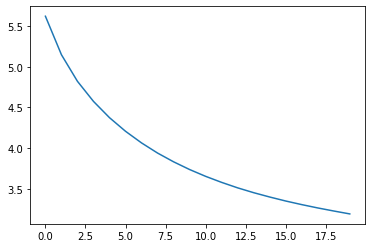

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(20),Losses)

In [55]:
############### Add mini batching ############### 
X=np.array([[1,2,3],
[4,5,6],
[7,8,9],
[10,11,12],
[13,14,15],
[16,17,18],
[19,20,21],
[22,23,24],
[25,26,27],
[28,29,30]])

### batch of 2 ###
size=10
batch_size=3
steps=10//batch_size
for i in range(steps):
    if i==0:
        start=0
        next_item=start+batch_size
        print(X[start:next_item,])	
    if i<(steps-2):
        start+=batch_size
        next_item+=batch_size
        print(X[start:next_item,])
    if i==steps-1:
        start+=batch_size
        print(X[start:,])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[10 11 12]
 [13 14 15]
 [16 17 18]]
[[19 20 21]
 [22 23 24]
 [25 26 27]
 [28 29 30]]


In [57]:
####### Model init ########
model=MLP(784)
model.add_layer(30,"sigmoid")
model.add_layer(10,"softmax")
X=mnist_train.drop('label',axis=1).values
y=mnist_train['label'].values
Losses=[]
##### Training loop ##########
batch_size=100
size=X.shape[0]
steps=size//batch_size
num_epoch=30
def run(model,X,y,start,next_value,lr=0.1):
    x=X[start:next_item,]
    Y=y[start:next_item]
    preds=model.forward(x)
    accuracy=(preds.argmax(axis=1)==Y).mean()
    loss=round(ce_loss(preds,Y),2)
    Losses.append(loss)
    print(f"Epoch {i}, Iteration {j}, loss{loss}, accuracy {accuracy}")
    model.backward(Y,x)
    model.update_weights(lr)    
for i in range(num_epoch):
    for j in range(steps):
        if j==0:
            start=0
            next_item=start+batch_size
            run(model,X,y,start,next_item)
        else :
            start+=batch_size
            next_item+=batch_size
            run(model,X,y,start,next_item)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


Epoch 0, Iteration 0, loss6.01, accuracy 0.18
Epoch 0, Iteration 1, loss5.34, accuracy 0.15
Epoch 0, Iteration 2, loss5.87, accuracy 0.15
Epoch 0, Iteration 3, loss6.33, accuracy 0.11
Epoch 0, Iteration 4, loss5.05, accuracy 0.16
Epoch 0, Iteration 5, loss5.57, accuracy 0.21
Epoch 0, Iteration 6, loss4.65, accuracy 0.24
Epoch 0, Iteration 7, loss4.84, accuracy 0.19
Epoch 0, Iteration 8, loss4.42, accuracy 0.2
Epoch 0, Iteration 9, loss4.94, accuracy 0.15
Epoch 0, Iteration 10, loss4.7, accuracy 0.19
Epoch 0, Iteration 11, loss5.41, accuracy 0.09
Epoch 0, Iteration 12, loss4.66, accuracy 0.13
Epoch 0, Iteration 13, loss4.8, accuracy 0.16
Epoch 0, Iteration 14, loss4.5, accuracy 0.22
Epoch 0, Iteration 15, loss4.58, accuracy 0.12
Epoch 0, Iteration 16, loss4.38, accuracy 0.17
Epoch 0, Iteration 17, loss4.45, accuracy 0.16
Epoch 0, Iteration 18, loss4.18, accuracy 0.18
Epoch 0, Iteration 19, loss4.09, accuracy 0.19
Epoch 0, Iteration 20, loss3.83, accuracy 0.22
Epoch 0, Iteration 21, loss

Epoch 0, Iteration 195, loss2.49, accuracy 0.24
Epoch 0, Iteration 196, loss2.14, accuracy 0.33
Epoch 0, Iteration 197, loss2.35, accuracy 0.27
Epoch 0, Iteration 198, loss2.61, accuracy 0.31
Epoch 0, Iteration 199, loss2.84, accuracy 0.2
Epoch 0, Iteration 200, loss2.59, accuracy 0.27
Epoch 0, Iteration 201, loss2.6, accuracy 0.24
Epoch 0, Iteration 202, loss2.57, accuracy 0.29
Epoch 0, Iteration 203, loss2.41, accuracy 0.32
Epoch 0, Iteration 204, loss2.19, accuracy 0.33
Epoch 0, Iteration 205, loss2.59, accuracy 0.26
Epoch 0, Iteration 206, loss2.74, accuracy 0.28
Epoch 0, Iteration 207, loss2.54, accuracy 0.27
Epoch 0, Iteration 208, loss2.64, accuracy 0.29
Epoch 0, Iteration 209, loss2.39, accuracy 0.31
Epoch 0, Iteration 210, loss2.77, accuracy 0.28
Epoch 0, Iteration 211, loss2.55, accuracy 0.3
Epoch 0, Iteration 212, loss2.65, accuracy 0.26
Epoch 0, Iteration 213, loss2.16, accuracy 0.29
Epoch 0, Iteration 214, loss2.23, accuracy 0.32
Epoch 0, Iteration 215, loss2.53, accuracy 

Epoch 0, Iteration 376, loss1.88, accuracy 0.37
Epoch 0, Iteration 377, loss1.77, accuracy 0.4
Epoch 0, Iteration 378, loss2.02, accuracy 0.43
Epoch 0, Iteration 379, loss2.18, accuracy 0.31
Epoch 0, Iteration 380, loss2.08, accuracy 0.41
Epoch 0, Iteration 381, loss1.99, accuracy 0.36
Epoch 0, Iteration 382, loss1.85, accuracy 0.43
Epoch 0, Iteration 383, loss1.71, accuracy 0.42
Epoch 0, Iteration 384, loss1.69, accuracy 0.39
Epoch 0, Iteration 385, loss1.91, accuracy 0.4
Epoch 0, Iteration 386, loss2.19, accuracy 0.32
Epoch 0, Iteration 387, loss2.27, accuracy 0.36
Epoch 0, Iteration 388, loss2.03, accuracy 0.33
Epoch 0, Iteration 389, loss2.12, accuracy 0.35
Epoch 0, Iteration 390, loss2.02, accuracy 0.37
Epoch 0, Iteration 391, loss1.96, accuracy 0.36
Epoch 0, Iteration 392, loss1.89, accuracy 0.41
Epoch 0, Iteration 393, loss2.12, accuracy 0.31
Epoch 0, Iteration 394, loss1.84, accuracy 0.44
Epoch 0, Iteration 395, loss1.87, accuracy 0.42
Epoch 0, Iteration 396, loss1.92, accuracy

Epoch 1, Iteration 136, loss1.67, accuracy 0.43
Epoch 1, Iteration 137, loss1.63, accuracy 0.41
Epoch 1, Iteration 138, loss1.6, accuracy 0.5
Epoch 1, Iteration 139, loss1.56, accuracy 0.43
Epoch 1, Iteration 140, loss1.89, accuracy 0.36
Epoch 1, Iteration 141, loss1.86, accuracy 0.4
Epoch 1, Iteration 142, loss1.81, accuracy 0.38
Epoch 1, Iteration 143, loss1.72, accuracy 0.46
Epoch 1, Iteration 144, loss1.77, accuracy 0.48
Epoch 1, Iteration 145, loss1.84, accuracy 0.46
Epoch 1, Iteration 146, loss1.95, accuracy 0.43
Epoch 1, Iteration 147, loss1.87, accuracy 0.4
Epoch 1, Iteration 148, loss1.67, accuracy 0.46
Epoch 1, Iteration 149, loss1.65, accuracy 0.47
Epoch 1, Iteration 150, loss1.67, accuracy 0.47
Epoch 1, Iteration 151, loss1.6, accuracy 0.41
Epoch 1, Iteration 152, loss1.55, accuracy 0.5
Epoch 1, Iteration 153, loss1.82, accuracy 0.43
Epoch 1, Iteration 154, loss1.84, accuracy 0.38
Epoch 1, Iteration 155, loss1.55, accuracy 0.55
Epoch 1, Iteration 156, loss1.69, accuracy 0.4

Epoch 1, Iteration 319, loss1.66, accuracy 0.44
Epoch 1, Iteration 320, loss1.68, accuracy 0.44
Epoch 1, Iteration 321, loss1.37, accuracy 0.51
Epoch 1, Iteration 322, loss1.39, accuracy 0.49
Epoch 1, Iteration 323, loss1.61, accuracy 0.51
Epoch 1, Iteration 324, loss1.63, accuracy 0.45
Epoch 1, Iteration 325, loss1.41, accuracy 0.54
Epoch 1, Iteration 326, loss1.5, accuracy 0.5
Epoch 1, Iteration 327, loss1.57, accuracy 0.47
Epoch 1, Iteration 328, loss1.65, accuracy 0.43
Epoch 1, Iteration 329, loss1.68, accuracy 0.46
Epoch 1, Iteration 330, loss1.44, accuracy 0.5
Epoch 1, Iteration 331, loss1.51, accuracy 0.53
Epoch 1, Iteration 332, loss1.4, accuracy 0.54
Epoch 1, Iteration 333, loss1.65, accuracy 0.45
Epoch 1, Iteration 334, loss1.72, accuracy 0.51
Epoch 1, Iteration 335, loss1.51, accuracy 0.52
Epoch 1, Iteration 336, loss1.48, accuracy 0.48
Epoch 1, Iteration 337, loss1.6, accuracy 0.53
Epoch 1, Iteration 338, loss1.24, accuracy 0.53
Epoch 1, Iteration 339, loss1.64, accuracy 0.

Epoch 2, Iteration 81, loss1.44, accuracy 0.56
Epoch 2, Iteration 82, loss1.37, accuracy 0.5
Epoch 2, Iteration 83, loss1.77, accuracy 0.43
Epoch 2, Iteration 84, loss1.54, accuracy 0.55
Epoch 2, Iteration 85, loss1.28, accuracy 0.57
Epoch 2, Iteration 86, loss1.48, accuracy 0.47
Epoch 2, Iteration 87, loss1.26, accuracy 0.59
Epoch 2, Iteration 88, loss1.38, accuracy 0.52
Epoch 2, Iteration 89, loss1.33, accuracy 0.56
Epoch 2, Iteration 90, loss1.4, accuracy 0.56
Epoch 2, Iteration 91, loss1.27, accuracy 0.59
Epoch 2, Iteration 92, loss1.31, accuracy 0.55
Epoch 2, Iteration 93, loss1.35, accuracy 0.55
Epoch 2, Iteration 94, loss1.54, accuracy 0.47
Epoch 2, Iteration 95, loss1.27, accuracy 0.58
Epoch 2, Iteration 96, loss1.46, accuracy 0.47
Epoch 2, Iteration 97, loss1.45, accuracy 0.48
Epoch 2, Iteration 98, loss1.48, accuracy 0.5
Epoch 2, Iteration 99, loss1.55, accuracy 0.51
Epoch 2, Iteration 100, loss1.19, accuracy 0.62
Epoch 2, Iteration 101, loss1.48, accuracy 0.48
Epoch 2, Itera

Epoch 2, Iteration 296, loss1.3, accuracy 0.56
Epoch 2, Iteration 297, loss1.38, accuracy 0.57
Epoch 2, Iteration 298, loss1.5, accuracy 0.47
Epoch 2, Iteration 299, loss1.56, accuracy 0.47
Epoch 2, Iteration 300, loss1.25, accuracy 0.57
Epoch 2, Iteration 301, loss1.33, accuracy 0.53
Epoch 2, Iteration 302, loss1.17, accuracy 0.58
Epoch 2, Iteration 303, loss1.34, accuracy 0.52
Epoch 2, Iteration 304, loss1.16, accuracy 0.58
Epoch 2, Iteration 305, loss1.25, accuracy 0.56
Epoch 2, Iteration 306, loss1.3, accuracy 0.54
Epoch 2, Iteration 307, loss1.47, accuracy 0.46
Epoch 2, Iteration 308, loss1.3, accuracy 0.58
Epoch 2, Iteration 309, loss1.24, accuracy 0.56
Epoch 2, Iteration 310, loss1.37, accuracy 0.56
Epoch 2, Iteration 311, loss1.49, accuracy 0.53
Epoch 2, Iteration 312, loss1.43, accuracy 0.47
Epoch 2, Iteration 313, loss1.25, accuracy 0.57
Epoch 2, Iteration 314, loss1.37, accuracy 0.55
Epoch 2, Iteration 315, loss1.26, accuracy 0.57
Epoch 2, Iteration 316, loss1.58, accuracy 0

Epoch 3, Iteration 130, loss1.12, accuracy 0.61
Epoch 3, Iteration 131, loss1.43, accuracy 0.56
Epoch 3, Iteration 132, loss1.34, accuracy 0.59
Epoch 3, Iteration 133, loss1.28, accuracy 0.48
Epoch 3, Iteration 134, loss1.32, accuracy 0.57
Epoch 3, Iteration 135, loss1.27, accuracy 0.56
Epoch 3, Iteration 136, loss1.27, accuracy 0.53
Epoch 3, Iteration 137, loss1.16, accuracy 0.65
Epoch 3, Iteration 138, loss1.17, accuracy 0.64
Epoch 3, Iteration 139, loss1.05, accuracy 0.68
Epoch 3, Iteration 140, loss1.28, accuracy 0.54
Epoch 3, Iteration 141, loss1.19, accuracy 0.6
Epoch 3, Iteration 142, loss1.29, accuracy 0.53
Epoch 3, Iteration 143, loss1.22, accuracy 0.58
Epoch 3, Iteration 144, loss1.16, accuracy 0.64
Epoch 3, Iteration 145, loss1.46, accuracy 0.54
Epoch 3, Iteration 146, loss1.29, accuracy 0.55
Epoch 3, Iteration 147, loss1.29, accuracy 0.59
Epoch 3, Iteration 148, loss1.21, accuracy 0.57
Epoch 3, Iteration 149, loss1.18, accuracy 0.62
Epoch 3, Iteration 150, loss1.32, accurac

Epoch 3, Iteration 303, loss1.24, accuracy 0.56
Epoch 3, Iteration 304, loss1.06, accuracy 0.65
Epoch 3, Iteration 305, loss1.17, accuracy 0.63
Epoch 3, Iteration 306, loss1.22, accuracy 0.57
Epoch 3, Iteration 307, loss1.32, accuracy 0.58
Epoch 3, Iteration 308, loss1.21, accuracy 0.62
Epoch 3, Iteration 309, loss1.1, accuracy 0.59
Epoch 3, Iteration 310, loss1.26, accuracy 0.54
Epoch 3, Iteration 311, loss1.37, accuracy 0.53
Epoch 3, Iteration 312, loss1.3, accuracy 0.52
Epoch 3, Iteration 313, loss1.14, accuracy 0.61
Epoch 3, Iteration 314, loss1.27, accuracy 0.58
Epoch 3, Iteration 315, loss1.19, accuracy 0.57
Epoch 3, Iteration 316, loss1.42, accuracy 0.49
Epoch 3, Iteration 317, loss1.0, accuracy 0.66
Epoch 3, Iteration 318, loss1.27, accuracy 0.54
Epoch 3, Iteration 319, loss1.34, accuracy 0.5
Epoch 3, Iteration 320, loss1.2, accuracy 0.59
Epoch 3, Iteration 321, loss1.06, accuracy 0.61
Epoch 3, Iteration 322, loss1.07, accuracy 0.6
Epoch 3, Iteration 323, loss1.26, accuracy 0.5

Epoch 4, Iteration 65, loss1.23, accuracy 0.55
Epoch 4, Iteration 66, loss1.3, accuracy 0.54
Epoch 4, Iteration 67, loss1.16, accuracy 0.59
Epoch 4, Iteration 68, loss1.05, accuracy 0.63
Epoch 4, Iteration 69, loss1.21, accuracy 0.61
Epoch 4, Iteration 70, loss1.25, accuracy 0.58
Epoch 4, Iteration 71, loss1.33, accuracy 0.52
Epoch 4, Iteration 72, loss1.27, accuracy 0.59
Epoch 4, Iteration 73, loss1.22, accuracy 0.56
Epoch 4, Iteration 74, loss1.2, accuracy 0.56
Epoch 4, Iteration 75, loss1.27, accuracy 0.58
Epoch 4, Iteration 76, loss1.36, accuracy 0.52
Epoch 4, Iteration 77, loss1.27, accuracy 0.64
Epoch 4, Iteration 78, loss1.04, accuracy 0.63
Epoch 4, Iteration 79, loss1.19, accuracy 0.55
Epoch 4, Iteration 80, loss1.27, accuracy 0.45
Epoch 4, Iteration 81, loss1.13, accuracy 0.65
Epoch 4, Iteration 82, loss1.05, accuracy 0.61
Epoch 4, Iteration 83, loss1.51, accuracy 0.48
Epoch 4, Iteration 84, loss1.22, accuracy 0.58
Epoch 4, Iteration 85, loss1.01, accuracy 0.61
Epoch 4, Iterat

Epoch 4, Iteration 244, loss1.26, accuracy 0.52
Epoch 4, Iteration 245, loss1.45, accuracy 0.5
Epoch 4, Iteration 246, loss0.93, accuracy 0.72
Epoch 4, Iteration 247, loss1.19, accuracy 0.57
Epoch 4, Iteration 248, loss1.03, accuracy 0.65
Epoch 4, Iteration 249, loss1.13, accuracy 0.63
Epoch 4, Iteration 250, loss1.26, accuracy 0.6
Epoch 4, Iteration 251, loss0.95, accuracy 0.66
Epoch 4, Iteration 252, loss1.31, accuracy 0.59
Epoch 4, Iteration 253, loss1.17, accuracy 0.61
Epoch 4, Iteration 254, loss1.08, accuracy 0.62
Epoch 4, Iteration 255, loss1.05, accuracy 0.66
Epoch 4, Iteration 256, loss1.29, accuracy 0.56
Epoch 4, Iteration 257, loss1.3, accuracy 0.5
Epoch 4, Iteration 258, loss1.29, accuracy 0.56
Epoch 4, Iteration 259, loss1.22, accuracy 0.53
Epoch 4, Iteration 260, loss1.08, accuracy 0.63
Epoch 4, Iteration 261, loss1.24, accuracy 0.54
Epoch 4, Iteration 262, loss1.16, accuracy 0.63
Epoch 4, Iteration 263, loss1.31, accuracy 0.55
Epoch 4, Iteration 264, loss1.16, accuracy 0

Epoch 5, Iteration 14, loss1.0, accuracy 0.68
Epoch 5, Iteration 15, loss1.18, accuracy 0.57
Epoch 5, Iteration 16, loss1.06, accuracy 0.6
Epoch 5, Iteration 17, loss1.27, accuracy 0.61
Epoch 5, Iteration 18, loss1.11, accuracy 0.67
Epoch 5, Iteration 19, loss1.02, accuracy 0.66
Epoch 5, Iteration 20, loss0.97, accuracy 0.63
Epoch 5, Iteration 21, loss1.11, accuracy 0.58
Epoch 5, Iteration 22, loss1.03, accuracy 0.69
Epoch 5, Iteration 23, loss1.35, accuracy 0.53
Epoch 5, Iteration 24, loss1.23, accuracy 0.57
Epoch 5, Iteration 25, loss1.21, accuracy 0.62
Epoch 5, Iteration 26, loss0.89, accuracy 0.74
Epoch 5, Iteration 27, loss1.16, accuracy 0.67
Epoch 5, Iteration 28, loss1.0, accuracy 0.65
Epoch 5, Iteration 29, loss1.25, accuracy 0.63
Epoch 5, Iteration 30, loss1.28, accuracy 0.61
Epoch 5, Iteration 31, loss0.89, accuracy 0.73
Epoch 5, Iteration 32, loss1.24, accuracy 0.6
Epoch 5, Iteration 33, loss1.11, accuracy 0.6
Epoch 5, Iteration 34, loss1.25, accuracy 0.6
Epoch 5, Iteration 

Epoch 5, Iteration 272, loss0.99, accuracy 0.67
Epoch 5, Iteration 273, loss1.18, accuracy 0.57
Epoch 5, Iteration 274, loss1.32, accuracy 0.56
Epoch 5, Iteration 275, loss1.21, accuracy 0.59
Epoch 5, Iteration 276, loss1.02, accuracy 0.66
Epoch 5, Iteration 277, loss1.08, accuracy 0.63
Epoch 5, Iteration 278, loss1.2, accuracy 0.59
Epoch 5, Iteration 279, loss1.17, accuracy 0.64
Epoch 5, Iteration 280, loss1.12, accuracy 0.62
Epoch 5, Iteration 281, loss1.03, accuracy 0.63
Epoch 5, Iteration 282, loss1.16, accuracy 0.53
Epoch 5, Iteration 283, loss0.99, accuracy 0.66
Epoch 5, Iteration 284, loss1.11, accuracy 0.57
Epoch 5, Iteration 285, loss0.97, accuracy 0.68
Epoch 5, Iteration 286, loss1.29, accuracy 0.48
Epoch 5, Iteration 287, loss1.18, accuracy 0.58
Epoch 5, Iteration 288, loss1.18, accuracy 0.59
Epoch 5, Iteration 289, loss0.89, accuracy 0.65
Epoch 5, Iteration 290, loss1.15, accuracy 0.59
Epoch 5, Iteration 291, loss1.0, accuracy 0.62
Epoch 5, Iteration 292, loss1.22, accuracy

Epoch 6, Iteration 62, loss1.13, accuracy 0.62
Epoch 6, Iteration 63, loss1.14, accuracy 0.6
Epoch 6, Iteration 64, loss0.93, accuracy 0.66
Epoch 6, Iteration 65, loss1.12, accuracy 0.64
Epoch 6, Iteration 66, loss1.23, accuracy 0.58
Epoch 6, Iteration 67, loss1.11, accuracy 0.6
Epoch 6, Iteration 68, loss0.9, accuracy 0.67
Epoch 6, Iteration 69, loss1.2, accuracy 0.61
Epoch 6, Iteration 70, loss1.16, accuracy 0.64
Epoch 6, Iteration 71, loss1.24, accuracy 0.63
Epoch 6, Iteration 72, loss1.21, accuracy 0.6
Epoch 6, Iteration 73, loss1.15, accuracy 0.6
Epoch 6, Iteration 74, loss1.1, accuracy 0.62
Epoch 6, Iteration 75, loss1.08, accuracy 0.68
Epoch 6, Iteration 76, loss1.27, accuracy 0.54
Epoch 6, Iteration 77, loss1.18, accuracy 0.58
Epoch 6, Iteration 78, loss0.98, accuracy 0.67
Epoch 6, Iteration 79, loss1.05, accuracy 0.62
Epoch 6, Iteration 80, loss1.16, accuracy 0.56
Epoch 6, Iteration 81, loss1.09, accuracy 0.69
Epoch 6, Iteration 82, loss0.9, accuracy 0.71
Epoch 6, Iteration 83

Epoch 6, Iteration 290, loss1.11, accuracy 0.6
Epoch 6, Iteration 291, loss0.95, accuracy 0.62
Epoch 6, Iteration 292, loss1.18, accuracy 0.57
Epoch 6, Iteration 293, loss1.12, accuracy 0.6
Epoch 6, Iteration 294, loss0.95, accuracy 0.72
Epoch 6, Iteration 295, loss0.96, accuracy 0.69
Epoch 6, Iteration 296, loss1.07, accuracy 0.63
Epoch 6, Iteration 297, loss1.14, accuracy 0.61
Epoch 6, Iteration 298, loss1.23, accuracy 0.56
Epoch 6, Iteration 299, loss1.21, accuracy 0.57
Epoch 6, Iteration 300, loss0.94, accuracy 0.65
Epoch 6, Iteration 301, loss1.12, accuracy 0.64
Epoch 6, Iteration 302, loss0.96, accuracy 0.63
Epoch 6, Iteration 303, loss1.08, accuracy 0.62
Epoch 6, Iteration 304, loss1.05, accuracy 0.6
Epoch 6, Iteration 305, loss1.05, accuracy 0.68
Epoch 6, Iteration 306, loss1.08, accuracy 0.66
Epoch 6, Iteration 307, loss1.24, accuracy 0.56
Epoch 6, Iteration 308, loss1.03, accuracy 0.68
Epoch 6, Iteration 309, loss0.97, accuracy 0.66
Epoch 6, Iteration 310, loss1.13, accuracy 

Epoch 7, Iteration 51, loss1.12, accuracy 0.58
Epoch 7, Iteration 52, loss0.94, accuracy 0.65
Epoch 7, Iteration 53, loss1.15, accuracy 0.64
Epoch 7, Iteration 54, loss1.29, accuracy 0.59
Epoch 7, Iteration 55, loss1.08, accuracy 0.67
Epoch 7, Iteration 56, loss0.91, accuracy 0.67
Epoch 7, Iteration 57, loss1.01, accuracy 0.65
Epoch 7, Iteration 58, loss1.06, accuracy 0.63
Epoch 7, Iteration 59, loss0.96, accuracy 0.69
Epoch 7, Iteration 60, loss0.93, accuracy 0.66
Epoch 7, Iteration 61, loss1.0, accuracy 0.69
Epoch 7, Iteration 62, loss1.09, accuracy 0.62
Epoch 7, Iteration 63, loss1.06, accuracy 0.59
Epoch 7, Iteration 64, loss0.93, accuracy 0.68
Epoch 7, Iteration 65, loss1.12, accuracy 0.62
Epoch 7, Iteration 66, loss1.19, accuracy 0.58
Epoch 7, Iteration 67, loss1.05, accuracy 0.65
Epoch 7, Iteration 68, loss0.9, accuracy 0.69
Epoch 7, Iteration 69, loss1.17, accuracy 0.62
Epoch 7, Iteration 70, loss1.21, accuracy 0.64
Epoch 7, Iteration 71, loss1.2, accuracy 0.64
Epoch 7, Iterati

Epoch 7, Iteration 268, loss1.07, accuracy 0.63
Epoch 7, Iteration 269, loss0.96, accuracy 0.7
Epoch 7, Iteration 270, loss0.97, accuracy 0.72
Epoch 7, Iteration 271, loss1.17, accuracy 0.64
Epoch 7, Iteration 272, loss0.96, accuracy 0.71
Epoch 7, Iteration 273, loss1.13, accuracy 0.59
Epoch 7, Iteration 274, loss1.23, accuracy 0.58
Epoch 7, Iteration 275, loss1.18, accuracy 0.63
Epoch 7, Iteration 276, loss0.96, accuracy 0.69
Epoch 7, Iteration 277, loss1.03, accuracy 0.68
Epoch 7, Iteration 278, loss1.12, accuracy 0.66
Epoch 7, Iteration 279, loss1.14, accuracy 0.67
Epoch 7, Iteration 280, loss1.06, accuracy 0.61
Epoch 7, Iteration 281, loss0.95, accuracy 0.65
Epoch 7, Iteration 282, loss1.14, accuracy 0.57
Epoch 7, Iteration 283, loss0.92, accuracy 0.69
Epoch 7, Iteration 284, loss1.07, accuracy 0.59
Epoch 7, Iteration 285, loss0.95, accuracy 0.69
Epoch 7, Iteration 286, loss1.12, accuracy 0.55
Epoch 7, Iteration 287, loss1.13, accuracy 0.62
Epoch 7, Iteration 288, loss1.11, accurac

Epoch 8, Iteration 60, loss0.92, accuracy 0.66
Epoch 8, Iteration 61, loss1.01, accuracy 0.68
Epoch 8, Iteration 62, loss1.06, accuracy 0.62
Epoch 8, Iteration 63, loss1.05, accuracy 0.61
Epoch 8, Iteration 64, loss0.93, accuracy 0.68
Epoch 8, Iteration 65, loss1.12, accuracy 0.64
Epoch 8, Iteration 66, loss1.15, accuracy 0.59
Epoch 8, Iteration 67, loss1.04, accuracy 0.64
Epoch 8, Iteration 68, loss0.85, accuracy 0.71
Epoch 8, Iteration 69, loss1.15, accuracy 0.62
Epoch 8, Iteration 70, loss1.2, accuracy 0.65
Epoch 8, Iteration 71, loss1.16, accuracy 0.65
Epoch 8, Iteration 72, loss1.12, accuracy 0.63
Epoch 8, Iteration 73, loss1.14, accuracy 0.61
Epoch 8, Iteration 74, loss1.1, accuracy 0.59
Epoch 8, Iteration 75, loss1.05, accuracy 0.69
Epoch 8, Iteration 76, loss1.21, accuracy 0.55
Epoch 8, Iteration 77, loss1.13, accuracy 0.6
Epoch 8, Iteration 78, loss0.99, accuracy 0.63
Epoch 8, Iteration 79, loss1.05, accuracy 0.62
Epoch 8, Iteration 80, loss1.23, accuracy 0.54
Epoch 8, Iterati

Epoch 8, Iteration 253, loss0.98, accuracy 0.69
Epoch 8, Iteration 254, loss0.92, accuracy 0.67
Epoch 8, Iteration 255, loss0.91, accuracy 0.7
Epoch 8, Iteration 256, loss1.08, accuracy 0.61
Epoch 8, Iteration 257, loss1.18, accuracy 0.58
Epoch 8, Iteration 258, loss1.11, accuracy 0.66
Epoch 8, Iteration 259, loss1.11, accuracy 0.59
Epoch 8, Iteration 260, loss0.89, accuracy 0.71
Epoch 8, Iteration 261, loss0.99, accuracy 0.61
Epoch 8, Iteration 262, loss1.01, accuracy 0.68
Epoch 8, Iteration 263, loss1.17, accuracy 0.59
Epoch 8, Iteration 264, loss1.04, accuracy 0.65
Epoch 8, Iteration 265, loss1.12, accuracy 0.55
Epoch 8, Iteration 266, loss1.22, accuracy 0.57
Epoch 8, Iteration 267, loss0.91, accuracy 0.69
Epoch 8, Iteration 268, loss1.08, accuracy 0.61
Epoch 8, Iteration 269, loss0.94, accuracy 0.69
Epoch 8, Iteration 270, loss0.98, accuracy 0.71
Epoch 8, Iteration 271, loss1.16, accuracy 0.65
Epoch 8, Iteration 272, loss0.93, accuracy 0.73
Epoch 8, Iteration 273, loss1.11, accurac

Epoch 9, Iteration 50, loss1.04, accuracy 0.71
Epoch 9, Iteration 51, loss1.07, accuracy 0.6
Epoch 9, Iteration 52, loss0.9, accuracy 0.65
Epoch 9, Iteration 53, loss1.1, accuracy 0.68
Epoch 9, Iteration 54, loss1.26, accuracy 0.63
Epoch 9, Iteration 55, loss1.08, accuracy 0.64
Epoch 9, Iteration 56, loss0.89, accuracy 0.69
Epoch 9, Iteration 57, loss0.98, accuracy 0.68
Epoch 9, Iteration 58, loss1.0, accuracy 0.65
Epoch 9, Iteration 59, loss0.95, accuracy 0.69
Epoch 9, Iteration 60, loss0.91, accuracy 0.68
Epoch 9, Iteration 61, loss1.01, accuracy 0.68
Epoch 9, Iteration 62, loss1.05, accuracy 0.62
Epoch 9, Iteration 63, loss1.03, accuracy 0.62
Epoch 9, Iteration 64, loss0.89, accuracy 0.71
Epoch 9, Iteration 65, loss1.14, accuracy 0.62
Epoch 9, Iteration 66, loss1.14, accuracy 0.6
Epoch 9, Iteration 67, loss1.04, accuracy 0.64
Epoch 9, Iteration 68, loss0.9, accuracy 0.71
Epoch 9, Iteration 69, loss1.17, accuracy 0.62
Epoch 9, Iteration 70, loss1.17, accuracy 0.65
Epoch 9, Iteration 

Epoch 9, Iteration 244, loss1.11, accuracy 0.62
Epoch 9, Iteration 245, loss1.29, accuracy 0.56
Epoch 9, Iteration 246, loss0.86, accuracy 0.73
Epoch 9, Iteration 247, loss1.04, accuracy 0.62
Epoch 9, Iteration 248, loss0.99, accuracy 0.67
Epoch 9, Iteration 249, loss0.97, accuracy 0.66
Epoch 9, Iteration 250, loss1.19, accuracy 0.61
Epoch 9, Iteration 251, loss0.84, accuracy 0.7
Epoch 9, Iteration 252, loss1.24, accuracy 0.6
Epoch 9, Iteration 253, loss0.93, accuracy 0.69
Epoch 9, Iteration 254, loss0.93, accuracy 0.66
Epoch 9, Iteration 255, loss0.89, accuracy 0.71
Epoch 9, Iteration 256, loss1.08, accuracy 0.61
Epoch 9, Iteration 257, loss1.15, accuracy 0.59
Epoch 9, Iteration 258, loss1.07, accuracy 0.67
Epoch 9, Iteration 259, loss1.11, accuracy 0.61
Epoch 9, Iteration 260, loss0.9, accuracy 0.7
Epoch 9, Iteration 261, loss0.96, accuracy 0.64
Epoch 9, Iteration 262, loss0.96, accuracy 0.68
Epoch 9, Iteration 263, loss1.15, accuracy 0.62
Epoch 9, Iteration 264, loss1.02, accuracy 0

Epoch 9, Iteration 418, loss0.91, accuracy 0.66
Epoch 9, Iteration 419, loss0.92, accuracy 0.67
Epoch 10, Iteration 0, loss1.09, accuracy 0.62
Epoch 10, Iteration 1, loss1.13, accuracy 0.63
Epoch 10, Iteration 2, loss1.06, accuracy 0.65
Epoch 10, Iteration 3, loss1.08, accuracy 0.64
Epoch 10, Iteration 4, loss0.95, accuracy 0.68
Epoch 10, Iteration 5, loss1.02, accuracy 0.65
Epoch 10, Iteration 6, loss1.14, accuracy 0.64
Epoch 10, Iteration 7, loss1.16, accuracy 0.63
Epoch 10, Iteration 8, loss0.84, accuracy 0.74
Epoch 10, Iteration 9, loss1.08, accuracy 0.58
Epoch 10, Iteration 10, loss0.93, accuracy 0.67
Epoch 10, Iteration 11, loss1.28, accuracy 0.58
Epoch 10, Iteration 12, loss1.17, accuracy 0.64
Epoch 10, Iteration 13, loss0.85, accuracy 0.71
Epoch 10, Iteration 14, loss0.85, accuracy 0.75
Epoch 10, Iteration 15, loss1.09, accuracy 0.62
Epoch 10, Iteration 16, loss0.96, accuracy 0.67
Epoch 10, Iteration 17, loss1.14, accuracy 0.55
Epoch 10, Iteration 18, loss1.08, accuracy 0.66
Ep

Epoch 10, Iteration 250, loss1.19, accuracy 0.63
Epoch 10, Iteration 251, loss0.83, accuracy 0.69
Epoch 10, Iteration 252, loss1.19, accuracy 0.63
Epoch 10, Iteration 253, loss0.93, accuracy 0.66
Epoch 10, Iteration 254, loss0.91, accuracy 0.67
Epoch 10, Iteration 255, loss0.87, accuracy 0.71
Epoch 10, Iteration 256, loss1.06, accuracy 0.61
Epoch 10, Iteration 257, loss1.21, accuracy 0.57
Epoch 10, Iteration 258, loss1.05, accuracy 0.7
Epoch 10, Iteration 259, loss1.1, accuracy 0.59
Epoch 10, Iteration 260, loss0.9, accuracy 0.69
Epoch 10, Iteration 261, loss0.93, accuracy 0.65
Epoch 10, Iteration 262, loss0.94, accuracy 0.68
Epoch 10, Iteration 263, loss1.11, accuracy 0.63
Epoch 10, Iteration 264, loss1.0, accuracy 0.66
Epoch 10, Iteration 265, loss1.11, accuracy 0.59
Epoch 10, Iteration 266, loss1.23, accuracy 0.56
Epoch 10, Iteration 267, loss0.87, accuracy 0.69
Epoch 10, Iteration 268, loss1.04, accuracy 0.64
Epoch 10, Iteration 269, loss0.92, accuracy 0.7
Epoch 10, Iteration 270, 

Epoch 11, Iteration 3, loss1.07, accuracy 0.62
Epoch 11, Iteration 4, loss0.95, accuracy 0.69
Epoch 11, Iteration 5, loss1.0, accuracy 0.66
Epoch 11, Iteration 6, loss1.12, accuracy 0.64
Epoch 11, Iteration 7, loss1.2, accuracy 0.61
Epoch 11, Iteration 8, loss0.83, accuracy 0.74
Epoch 11, Iteration 9, loss1.07, accuracy 0.59
Epoch 11, Iteration 10, loss0.92, accuracy 0.69
Epoch 11, Iteration 11, loss1.33, accuracy 0.54
Epoch 11, Iteration 12, loss1.15, accuracy 0.64
Epoch 11, Iteration 13, loss0.88, accuracy 0.7
Epoch 11, Iteration 14, loss0.85, accuracy 0.75
Epoch 11, Iteration 15, loss1.09, accuracy 0.61
Epoch 11, Iteration 16, loss0.96, accuracy 0.66
Epoch 11, Iteration 17, loss1.13, accuracy 0.54
Epoch 11, Iteration 18, loss1.07, accuracy 0.66
Epoch 11, Iteration 19, loss0.96, accuracy 0.7
Epoch 11, Iteration 20, loss0.88, accuracy 0.68
Epoch 11, Iteration 21, loss1.02, accuracy 0.65
Epoch 11, Iteration 22, loss1.0, accuracy 0.66
Epoch 11, Iteration 23, loss1.31, accuracy 0.55
Epoc

Epoch 11, Iteration 212, loss0.99, accuracy 0.67
Epoch 11, Iteration 213, loss0.94, accuracy 0.65
Epoch 11, Iteration 214, loss1.21, accuracy 0.61
Epoch 11, Iteration 215, loss1.31, accuracy 0.56
Epoch 11, Iteration 216, loss1.09, accuracy 0.61
Epoch 11, Iteration 217, loss1.15, accuracy 0.62
Epoch 11, Iteration 218, loss1.15, accuracy 0.59
Epoch 11, Iteration 219, loss0.84, accuracy 0.71
Epoch 11, Iteration 220, loss0.96, accuracy 0.69
Epoch 11, Iteration 221, loss1.17, accuracy 0.62
Epoch 11, Iteration 222, loss0.87, accuracy 0.7
Epoch 11, Iteration 223, loss0.85, accuracy 0.74
Epoch 11, Iteration 224, loss1.08, accuracy 0.67
Epoch 11, Iteration 225, loss1.12, accuracy 0.63
Epoch 11, Iteration 226, loss1.03, accuracy 0.62
Epoch 11, Iteration 227, loss0.95, accuracy 0.65
Epoch 11, Iteration 228, loss1.1, accuracy 0.63
Epoch 11, Iteration 229, loss1.12, accuracy 0.67
Epoch 11, Iteration 230, loss1.06, accuracy 0.63
Epoch 11, Iteration 231, loss1.02, accuracy 0.69
Epoch 11, Iteration 23

Epoch 11, Iteration 386, loss1.08, accuracy 0.64
Epoch 11, Iteration 387, loss0.98, accuracy 0.67
Epoch 11, Iteration 388, loss1.07, accuracy 0.61
Epoch 11, Iteration 389, loss1.11, accuracy 0.7
Epoch 11, Iteration 390, loss0.89, accuracy 0.67
Epoch 11, Iteration 391, loss1.03, accuracy 0.55
Epoch 11, Iteration 392, loss0.94, accuracy 0.72
Epoch 11, Iteration 393, loss0.95, accuracy 0.68
Epoch 11, Iteration 394, loss0.92, accuracy 0.65
Epoch 11, Iteration 395, loss0.97, accuracy 0.7
Epoch 11, Iteration 396, loss0.93, accuracy 0.61
Epoch 11, Iteration 397, loss1.2, accuracy 0.59
Epoch 11, Iteration 398, loss1.04, accuracy 0.64
Epoch 11, Iteration 399, loss0.9, accuracy 0.73
Epoch 11, Iteration 400, loss1.14, accuracy 0.65
Epoch 11, Iteration 401, loss0.82, accuracy 0.77
Epoch 11, Iteration 402, loss0.99, accuracy 0.7
Epoch 11, Iteration 403, loss1.17, accuracy 0.65
Epoch 11, Iteration 404, loss0.82, accuracy 0.73
Epoch 11, Iteration 405, loss1.18, accuracy 0.56
Epoch 11, Iteration 406, 

Epoch 12, Iteration 179, loss1.04, accuracy 0.67
Epoch 12, Iteration 180, loss1.03, accuracy 0.64
Epoch 12, Iteration 181, loss0.92, accuracy 0.74
Epoch 12, Iteration 182, loss1.02, accuracy 0.65
Epoch 12, Iteration 183, loss0.96, accuracy 0.64
Epoch 12, Iteration 184, loss0.86, accuracy 0.75
Epoch 12, Iteration 185, loss1.04, accuracy 0.63
Epoch 12, Iteration 186, loss0.98, accuracy 0.67
Epoch 12, Iteration 187, loss1.15, accuracy 0.63
Epoch 12, Iteration 188, loss1.33, accuracy 0.59
Epoch 12, Iteration 189, loss0.9, accuracy 0.7
Epoch 12, Iteration 190, loss1.06, accuracy 0.65
Epoch 12, Iteration 191, loss0.93, accuracy 0.7
Epoch 12, Iteration 192, loss0.96, accuracy 0.74
Epoch 12, Iteration 193, loss1.01, accuracy 0.66
Epoch 12, Iteration 194, loss1.04, accuracy 0.67
Epoch 12, Iteration 195, loss0.78, accuracy 0.75
Epoch 12, Iteration 196, loss0.94, accuracy 0.73
Epoch 12, Iteration 197, loss0.91, accuracy 0.69
Epoch 12, Iteration 198, loss0.92, accuracy 0.65
Epoch 12, Iteration 199

Epoch 12, Iteration 373, loss1.03, accuracy 0.68
Epoch 12, Iteration 374, loss0.88, accuracy 0.74
Epoch 12, Iteration 375, loss1.0, accuracy 0.62
Epoch 12, Iteration 376, loss1.01, accuracy 0.64
Epoch 12, Iteration 377, loss1.03, accuracy 0.68
Epoch 12, Iteration 378, loss1.08, accuracy 0.59
Epoch 12, Iteration 379, loss1.14, accuracy 0.67
Epoch 12, Iteration 380, loss1.17, accuracy 0.59
Epoch 12, Iteration 381, loss0.98, accuracy 0.67
Epoch 12, Iteration 382, loss1.0, accuracy 0.6
Epoch 12, Iteration 383, loss0.84, accuracy 0.71
Epoch 12, Iteration 384, loss0.81, accuracy 0.74
Epoch 12, Iteration 385, loss0.99, accuracy 0.62
Epoch 12, Iteration 386, loss1.07, accuracy 0.63
Epoch 12, Iteration 387, loss0.98, accuracy 0.67
Epoch 12, Iteration 388, loss1.07, accuracy 0.59
Epoch 12, Iteration 389, loss1.11, accuracy 0.7
Epoch 12, Iteration 390, loss0.89, accuracy 0.67
Epoch 12, Iteration 391, loss1.02, accuracy 0.57
Epoch 12, Iteration 392, loss0.94, accuracy 0.71
Epoch 12, Iteration 393,

Epoch 13, Iteration 142, loss1.06, accuracy 0.61
Epoch 13, Iteration 143, loss1.06, accuracy 0.66
Epoch 13, Iteration 144, loss1.04, accuracy 0.67
Epoch 13, Iteration 145, loss1.19, accuracy 0.64
Epoch 13, Iteration 146, loss1.02, accuracy 0.63
Epoch 13, Iteration 147, loss1.06, accuracy 0.65
Epoch 13, Iteration 148, loss1.01, accuracy 0.63
Epoch 13, Iteration 149, loss1.16, accuracy 0.59
Epoch 13, Iteration 150, loss1.06, accuracy 0.6
Epoch 13, Iteration 151, loss1.06, accuracy 0.64
Epoch 13, Iteration 152, loss0.92, accuracy 0.69
Epoch 13, Iteration 153, loss0.94, accuracy 0.65
Epoch 13, Iteration 154, loss1.01, accuracy 0.65
Epoch 13, Iteration 155, loss0.94, accuracy 0.67
Epoch 13, Iteration 156, loss0.98, accuracy 0.67
Epoch 13, Iteration 157, loss0.8, accuracy 0.79
Epoch 13, Iteration 158, loss0.99, accuracy 0.66
Epoch 13, Iteration 159, loss1.0, accuracy 0.7
Epoch 13, Iteration 160, loss1.11, accuracy 0.59
Epoch 13, Iteration 161, loss1.05, accuracy 0.67
Epoch 13, Iteration 162,

Epoch 13, Iteration 326, loss1.05, accuracy 0.64
Epoch 13, Iteration 327, loss1.05, accuracy 0.63
Epoch 13, Iteration 328, loss1.13, accuracy 0.58
Epoch 13, Iteration 329, loss1.05, accuracy 0.64
Epoch 13, Iteration 330, loss0.97, accuracy 0.69
Epoch 13, Iteration 331, loss1.18, accuracy 0.7
Epoch 13, Iteration 332, loss0.95, accuracy 0.72
Epoch 13, Iteration 333, loss1.06, accuracy 0.63
Epoch 13, Iteration 334, loss1.02, accuracy 0.69
Epoch 13, Iteration 335, loss1.1, accuracy 0.62
Epoch 13, Iteration 336, loss0.94, accuracy 0.67
Epoch 13, Iteration 337, loss1.07, accuracy 0.71
Epoch 13, Iteration 338, loss0.82, accuracy 0.73
Epoch 13, Iteration 339, loss1.01, accuracy 0.63
Epoch 13, Iteration 340, loss0.94, accuracy 0.68
Epoch 13, Iteration 341, loss1.12, accuracy 0.58
Epoch 13, Iteration 342, loss0.98, accuracy 0.62
Epoch 13, Iteration 343, loss0.99, accuracy 0.65
Epoch 13, Iteration 344, loss1.14, accuracy 0.63
Epoch 13, Iteration 345, loss1.04, accuracy 0.63
Epoch 13, Iteration 34

Epoch 14, Iteration 92, loss0.86, accuracy 0.7
Epoch 14, Iteration 93, loss0.9, accuracy 0.66
Epoch 14, Iteration 94, loss1.12, accuracy 0.6
Epoch 14, Iteration 95, loss0.94, accuracy 0.71
Epoch 14, Iteration 96, loss1.11, accuracy 0.59
Epoch 14, Iteration 97, loss1.03, accuracy 0.61
Epoch 14, Iteration 98, loss1.11, accuracy 0.59
Epoch 14, Iteration 99, loss1.08, accuracy 0.6
Epoch 14, Iteration 100, loss0.89, accuracy 0.75
Epoch 14, Iteration 101, loss1.02, accuracy 0.63
Epoch 14, Iteration 102, loss1.03, accuracy 0.66
Epoch 14, Iteration 103, loss0.92, accuracy 0.68
Epoch 14, Iteration 104, loss0.95, accuracy 0.69
Epoch 14, Iteration 105, loss0.84, accuracy 0.68
Epoch 14, Iteration 106, loss0.9, accuracy 0.69
Epoch 14, Iteration 107, loss1.06, accuracy 0.58
Epoch 14, Iteration 108, loss1.01, accuracy 0.68
Epoch 14, Iteration 109, loss1.07, accuracy 0.62
Epoch 14, Iteration 110, loss1.2, accuracy 0.61
Epoch 14, Iteration 111, loss1.0, accuracy 0.65
Epoch 14, Iteration 112, loss0.98, 

Epoch 14, Iteration 303, loss0.99, accuracy 0.65
Epoch 14, Iteration 304, loss1.0, accuracy 0.59
Epoch 14, Iteration 305, loss0.98, accuracy 0.67
Epoch 14, Iteration 306, loss0.92, accuracy 0.73
Epoch 14, Iteration 307, loss1.15, accuracy 0.64
Epoch 14, Iteration 308, loss0.89, accuracy 0.72
Epoch 14, Iteration 309, loss1.08, accuracy 0.6
Epoch 14, Iteration 310, loss1.08, accuracy 0.63
Epoch 14, Iteration 311, loss1.19, accuracy 0.6
Epoch 14, Iteration 312, loss1.12, accuracy 0.63
Epoch 14, Iteration 313, loss0.89, accuracy 0.69
Epoch 14, Iteration 314, loss0.96, accuracy 0.63
Epoch 14, Iteration 315, loss0.99, accuracy 0.68
Epoch 14, Iteration 316, loss1.19, accuracy 0.61
Epoch 14, Iteration 317, loss0.83, accuracy 0.68
Epoch 14, Iteration 318, loss1.13, accuracy 0.57
Epoch 14, Iteration 319, loss0.98, accuracy 0.68
Epoch 14, Iteration 320, loss1.02, accuracy 0.63
Epoch 14, Iteration 321, loss0.87, accuracy 0.69
Epoch 14, Iteration 322, loss0.91, accuracy 0.68
Epoch 14, Iteration 323

Epoch 15, Iteration 76, loss1.19, accuracy 0.56
Epoch 15, Iteration 77, loss1.1, accuracy 0.6
Epoch 15, Iteration 78, loss0.96, accuracy 0.7
Epoch 15, Iteration 79, loss0.96, accuracy 0.63
Epoch 15, Iteration 80, loss1.04, accuracy 0.66
Epoch 15, Iteration 81, loss1.03, accuracy 0.69
Epoch 15, Iteration 82, loss0.85, accuracy 0.7
Epoch 15, Iteration 83, loss1.15, accuracy 0.61
Epoch 15, Iteration 84, loss1.05, accuracy 0.61
Epoch 15, Iteration 85, loss0.88, accuracy 0.7
Epoch 15, Iteration 86, loss1.05, accuracy 0.69
Epoch 15, Iteration 87, loss0.83, accuracy 0.72
Epoch 15, Iteration 88, loss1.05, accuracy 0.66
Epoch 15, Iteration 89, loss0.89, accuracy 0.69
Epoch 15, Iteration 90, loss0.96, accuracy 0.69
Epoch 15, Iteration 91, loss0.87, accuracy 0.76
Epoch 15, Iteration 92, loss0.85, accuracy 0.7
Epoch 15, Iteration 93, loss0.89, accuracy 0.64
Epoch 15, Iteration 94, loss1.12, accuracy 0.61
Epoch 15, Iteration 95, loss0.95, accuracy 0.7
Epoch 15, Iteration 96, loss1.11, accuracy 0.6


Epoch 15, Iteration 279, loss1.17, accuracy 0.62
Epoch 15, Iteration 280, loss0.99, accuracy 0.6
Epoch 15, Iteration 281, loss0.9, accuracy 0.66
Epoch 15, Iteration 282, loss1.09, accuracy 0.64
Epoch 15, Iteration 283, loss0.8, accuracy 0.77
Epoch 15, Iteration 284, loss0.98, accuracy 0.68
Epoch 15, Iteration 285, loss0.9, accuracy 0.71
Epoch 15, Iteration 286, loss1.13, accuracy 0.57
Epoch 15, Iteration 287, loss1.1, accuracy 0.68
Epoch 15, Iteration 288, loss1.05, accuracy 0.64
Epoch 15, Iteration 289, loss0.81, accuracy 0.71
Epoch 15, Iteration 290, loss1.15, accuracy 0.59
Epoch 15, Iteration 291, loss0.93, accuracy 0.65
Epoch 15, Iteration 292, loss1.1, accuracy 0.66
Epoch 15, Iteration 293, loss0.94, accuracy 0.66
Epoch 15, Iteration 294, loss0.8, accuracy 0.71
Epoch 15, Iteration 295, loss0.88, accuracy 0.72
Epoch 15, Iteration 296, loss0.95, accuracy 0.66
Epoch 15, Iteration 297, loss1.12, accuracy 0.61
Epoch 15, Iteration 298, loss1.1, accuracy 0.58
Epoch 15, Iteration 299, los

Epoch 16, Iteration 49, loss1.06, accuracy 0.7
Epoch 16, Iteration 50, loss1.0, accuracy 0.72
Epoch 16, Iteration 51, loss1.06, accuracy 0.63
Epoch 16, Iteration 52, loss0.86, accuracy 0.68
Epoch 16, Iteration 53, loss1.06, accuracy 0.69
Epoch 16, Iteration 54, loss1.23, accuracy 0.68
Epoch 16, Iteration 55, loss1.14, accuracy 0.63
Epoch 16, Iteration 56, loss0.86, accuracy 0.71
Epoch 16, Iteration 57, loss0.91, accuracy 0.73
Epoch 16, Iteration 58, loss1.03, accuracy 0.63
Epoch 16, Iteration 59, loss0.94, accuracy 0.71
Epoch 16, Iteration 60, loss0.89, accuracy 0.71
Epoch 16, Iteration 61, loss0.98, accuracy 0.71
Epoch 16, Iteration 62, loss1.0, accuracy 0.65
Epoch 16, Iteration 63, loss0.96, accuracy 0.67
Epoch 16, Iteration 64, loss0.89, accuracy 0.69
Epoch 16, Iteration 65, loss1.07, accuracy 0.63
Epoch 16, Iteration 66, loss1.04, accuracy 0.65
Epoch 16, Iteration 67, loss0.96, accuracy 0.67
Epoch 16, Iteration 68, loss0.87, accuracy 0.67
Epoch 16, Iteration 69, loss1.09, accuracy 

Epoch 16, Iteration 237, loss1.05, accuracy 0.66
Epoch 16, Iteration 238, loss0.97, accuracy 0.65
Epoch 16, Iteration 239, loss1.06, accuracy 0.62
Epoch 16, Iteration 240, loss1.09, accuracy 0.66
Epoch 16, Iteration 241, loss1.01, accuracy 0.61
Epoch 16, Iteration 242, loss1.15, accuracy 0.62
Epoch 16, Iteration 243, loss0.97, accuracy 0.66
Epoch 16, Iteration 244, loss1.05, accuracy 0.67
Epoch 16, Iteration 245, loss1.33, accuracy 0.54
Epoch 16, Iteration 246, loss0.77, accuracy 0.73
Epoch 16, Iteration 247, loss0.98, accuracy 0.67
Epoch 16, Iteration 248, loss1.0, accuracy 0.68
Epoch 16, Iteration 249, loss0.92, accuracy 0.7
Epoch 16, Iteration 250, loss1.16, accuracy 0.65
Epoch 16, Iteration 251, loss0.82, accuracy 0.74
Epoch 16, Iteration 252, loss1.2, accuracy 0.63
Epoch 16, Iteration 253, loss0.91, accuracy 0.66
Epoch 16, Iteration 254, loss0.89, accuracy 0.68
Epoch 16, Iteration 255, loss0.81, accuracy 0.7
Epoch 16, Iteration 256, loss1.02, accuracy 0.66
Epoch 16, Iteration 257,

Epoch 17, Iteration 17, loss1.1, accuracy 0.63
Epoch 17, Iteration 18, loss1.09, accuracy 0.63
Epoch 17, Iteration 19, loss0.91, accuracy 0.71
Epoch 17, Iteration 20, loss0.84, accuracy 0.71
Epoch 17, Iteration 21, loss1.06, accuracy 0.63
Epoch 17, Iteration 22, loss1.0, accuracy 0.66
Epoch 17, Iteration 23, loss1.25, accuracy 0.55
Epoch 17, Iteration 24, loss1.08, accuracy 0.62
Epoch 17, Iteration 25, loss1.09, accuracy 0.67
Epoch 17, Iteration 26, loss0.75, accuracy 0.74
Epoch 17, Iteration 27, loss0.97, accuracy 0.68
Epoch 17, Iteration 28, loss0.83, accuracy 0.7
Epoch 17, Iteration 29, loss1.03, accuracy 0.66
Epoch 17, Iteration 30, loss1.16, accuracy 0.6
Epoch 17, Iteration 31, loss0.69, accuracy 0.82
Epoch 17, Iteration 32, loss1.1, accuracy 0.67
Epoch 17, Iteration 33, loss1.03, accuracy 0.68
Epoch 17, Iteration 34, loss0.95, accuracy 0.71
Epoch 17, Iteration 35, loss1.23, accuracy 0.57
Epoch 17, Iteration 36, loss0.95, accuracy 0.66
Epoch 17, Iteration 37, loss0.99, accuracy 0.

Epoch 17, Iteration 235, loss1.17, accuracy 0.66
Epoch 17, Iteration 236, loss1.2, accuracy 0.62
Epoch 17, Iteration 237, loss1.06, accuracy 0.66
Epoch 17, Iteration 238, loss0.97, accuracy 0.65
Epoch 17, Iteration 239, loss1.07, accuracy 0.63
Epoch 17, Iteration 240, loss1.08, accuracy 0.66
Epoch 17, Iteration 241, loss1.01, accuracy 0.6
Epoch 17, Iteration 242, loss1.15, accuracy 0.62
Epoch 17, Iteration 243, loss0.96, accuracy 0.66
Epoch 17, Iteration 244, loss1.05, accuracy 0.68
Epoch 17, Iteration 245, loss1.33, accuracy 0.55
Epoch 17, Iteration 246, loss0.76, accuracy 0.73
Epoch 17, Iteration 247, loss1.0, accuracy 0.67
Epoch 17, Iteration 248, loss1.01, accuracy 0.67
Epoch 17, Iteration 249, loss0.94, accuracy 0.69
Epoch 17, Iteration 250, loss1.16, accuracy 0.65
Epoch 17, Iteration 251, loss0.81, accuracy 0.73
Epoch 17, Iteration 252, loss1.22, accuracy 0.61
Epoch 17, Iteration 253, loss0.9, accuracy 0.65
Epoch 17, Iteration 254, loss0.88, accuracy 0.69
Epoch 17, Iteration 255,

Epoch 18, Iteration 8, loss0.89, accuracy 0.72
Epoch 18, Iteration 9, loss1.03, accuracy 0.62
Epoch 18, Iteration 10, loss0.85, accuracy 0.72
Epoch 18, Iteration 11, loss1.24, accuracy 0.59
Epoch 18, Iteration 12, loss1.11, accuracy 0.66
Epoch 18, Iteration 13, loss0.89, accuracy 0.71
Epoch 18, Iteration 14, loss0.83, accuracy 0.77
Epoch 18, Iteration 15, loss1.05, accuracy 0.63
Epoch 18, Iteration 16, loss0.96, accuracy 0.66
Epoch 18, Iteration 17, loss1.12, accuracy 0.63
Epoch 18, Iteration 18, loss1.07, accuracy 0.63
Epoch 18, Iteration 19, loss0.93, accuracy 0.71
Epoch 18, Iteration 20, loss0.85, accuracy 0.71
Epoch 18, Iteration 21, loss1.06, accuracy 0.64
Epoch 18, Iteration 22, loss1.02, accuracy 0.64
Epoch 18, Iteration 23, loss1.26, accuracy 0.56
Epoch 18, Iteration 24, loss1.06, accuracy 0.62
Epoch 18, Iteration 25, loss1.08, accuracy 0.67
Epoch 18, Iteration 26, loss0.74, accuracy 0.73
Epoch 18, Iteration 27, loss0.97, accuracy 0.68
Epoch 18, Iteration 28, loss0.84, accuracy

Epoch 18, Iteration 180, loss0.91, accuracy 0.72
Epoch 18, Iteration 181, loss0.89, accuracy 0.73
Epoch 18, Iteration 182, loss0.98, accuracy 0.66
Epoch 18, Iteration 183, loss0.98, accuracy 0.63
Epoch 18, Iteration 184, loss0.85, accuracy 0.77
Epoch 18, Iteration 185, loss1.0, accuracy 0.65
Epoch 18, Iteration 186, loss0.9, accuracy 0.73
Epoch 18, Iteration 187, loss1.11, accuracy 0.68
Epoch 18, Iteration 188, loss1.3, accuracy 0.59
Epoch 18, Iteration 189, loss0.85, accuracy 0.72
Epoch 18, Iteration 190, loss1.02, accuracy 0.65
Epoch 18, Iteration 191, loss0.92, accuracy 0.72
Epoch 18, Iteration 192, loss0.88, accuracy 0.75
Epoch 18, Iteration 193, loss0.95, accuracy 0.72
Epoch 18, Iteration 194, loss1.05, accuracy 0.64
Epoch 18, Iteration 195, loss0.78, accuracy 0.74
Epoch 18, Iteration 196, loss0.98, accuracy 0.76
Epoch 18, Iteration 197, loss0.85, accuracy 0.73
Epoch 18, Iteration 198, loss0.93, accuracy 0.67
Epoch 18, Iteration 199, loss1.08, accuracy 0.64
Epoch 18, Iteration 200

Epoch 18, Iteration 359, loss1.12, accuracy 0.64
Epoch 18, Iteration 360, loss0.89, accuracy 0.75
Epoch 18, Iteration 361, loss1.02, accuracy 0.63
Epoch 18, Iteration 362, loss1.05, accuracy 0.61
Epoch 18, Iteration 363, loss0.86, accuracy 0.7
Epoch 18, Iteration 364, loss0.95, accuracy 0.69
Epoch 18, Iteration 365, loss0.98, accuracy 0.67
Epoch 18, Iteration 366, loss1.02, accuracy 0.69
Epoch 18, Iteration 367, loss0.92, accuracy 0.68
Epoch 18, Iteration 368, loss0.96, accuracy 0.72
Epoch 18, Iteration 369, loss1.12, accuracy 0.64
Epoch 18, Iteration 370, loss1.23, accuracy 0.56
Epoch 18, Iteration 371, loss1.01, accuracy 0.63
Epoch 18, Iteration 372, loss1.0, accuracy 0.7
Epoch 18, Iteration 373, loss1.01, accuracy 0.65
Epoch 18, Iteration 374, loss0.9, accuracy 0.72
Epoch 18, Iteration 375, loss1.03, accuracy 0.62
Epoch 18, Iteration 376, loss0.99, accuracy 0.66
Epoch 18, Iteration 377, loss1.04, accuracy 0.66
Epoch 18, Iteration 378, loss1.05, accuracy 0.6
Epoch 18, Iteration 379, 

Epoch 19, Iteration 129, loss1.08, accuracy 0.63
Epoch 19, Iteration 130, loss1.1, accuracy 0.63
Epoch 19, Iteration 131, loss1.25, accuracy 0.61
Epoch 19, Iteration 132, loss1.08, accuracy 0.65
Epoch 19, Iteration 133, loss0.92, accuracy 0.69
Epoch 19, Iteration 134, loss1.15, accuracy 0.61
Epoch 19, Iteration 135, loss0.99, accuracy 0.59
Epoch 19, Iteration 136, loss0.92, accuracy 0.72
Epoch 19, Iteration 137, loss0.94, accuracy 0.68
Epoch 19, Iteration 138, loss1.03, accuracy 0.64
Epoch 19, Iteration 139, loss0.9, accuracy 0.72
Epoch 19, Iteration 140, loss0.99, accuracy 0.63
Epoch 19, Iteration 141, loss0.98, accuracy 0.64
Epoch 19, Iteration 142, loss0.98, accuracy 0.65
Epoch 19, Iteration 143, loss1.03, accuracy 0.68
Epoch 19, Iteration 144, loss1.0, accuracy 0.68
Epoch 19, Iteration 145, loss1.15, accuracy 0.64
Epoch 19, Iteration 146, loss0.9, accuracy 0.67
Epoch 19, Iteration 147, loss1.05, accuracy 0.65
Epoch 19, Iteration 148, loss0.93, accuracy 0.69
Epoch 19, Iteration 149,

Epoch 19, Iteration 314, loss0.96, accuracy 0.64
Epoch 19, Iteration 315, loss0.97, accuracy 0.69
Epoch 19, Iteration 316, loss1.24, accuracy 0.6
Epoch 19, Iteration 317, loss0.86, accuracy 0.67
Epoch 19, Iteration 318, loss1.11, accuracy 0.56
Epoch 19, Iteration 319, loss1.0, accuracy 0.68
Epoch 19, Iteration 320, loss1.01, accuracy 0.67
Epoch 19, Iteration 321, loss0.88, accuracy 0.7
Epoch 19, Iteration 322, loss0.89, accuracy 0.7
Epoch 19, Iteration 323, loss0.94, accuracy 0.69
Epoch 19, Iteration 324, loss0.96, accuracy 0.65
Epoch 19, Iteration 325, loss0.92, accuracy 0.73
Epoch 19, Iteration 326, loss1.03, accuracy 0.62
Epoch 19, Iteration 327, loss0.96, accuracy 0.66
Epoch 19, Iteration 328, loss1.14, accuracy 0.61
Epoch 19, Iteration 329, loss1.04, accuracy 0.65
Epoch 19, Iteration 330, loss0.92, accuracy 0.74
Epoch 19, Iteration 331, loss1.11, accuracy 0.68
Epoch 19, Iteration 332, loss0.97, accuracy 0.7
Epoch 19, Iteration 333, loss1.08, accuracy 0.64
Epoch 19, Iteration 334, 

Epoch 20, Iteration 84, loss1.03, accuracy 0.65
Epoch 20, Iteration 85, loss0.91, accuracy 0.67
Epoch 20, Iteration 86, loss1.04, accuracy 0.67
Epoch 20, Iteration 87, loss0.85, accuracy 0.71
Epoch 20, Iteration 88, loss1.05, accuracy 0.65
Epoch 20, Iteration 89, loss0.89, accuracy 0.69
Epoch 20, Iteration 90, loss0.94, accuracy 0.69
Epoch 20, Iteration 91, loss0.89, accuracy 0.77
Epoch 20, Iteration 92, loss0.85, accuracy 0.7
Epoch 20, Iteration 93, loss0.85, accuracy 0.66
Epoch 20, Iteration 94, loss1.1, accuracy 0.64
Epoch 20, Iteration 95, loss0.92, accuracy 0.73
Epoch 20, Iteration 96, loss1.06, accuracy 0.62
Epoch 20, Iteration 97, loss1.03, accuracy 0.64
Epoch 20, Iteration 98, loss1.06, accuracy 0.64
Epoch 20, Iteration 99, loss1.11, accuracy 0.59
Epoch 20, Iteration 100, loss0.91, accuracy 0.7
Epoch 20, Iteration 101, loss1.02, accuracy 0.63
Epoch 20, Iteration 102, loss1.04, accuracy 0.69
Epoch 20, Iteration 103, loss0.91, accuracy 0.74
Epoch 20, Iteration 104, loss0.92, accu

Epoch 20, Iteration 270, loss0.97, accuracy 0.71
Epoch 20, Iteration 271, loss1.09, accuracy 0.61
Epoch 20, Iteration 272, loss0.89, accuracy 0.73
Epoch 20, Iteration 273, loss0.98, accuracy 0.64
Epoch 20, Iteration 274, loss1.14, accuracy 0.61
Epoch 20, Iteration 275, loss1.19, accuracy 0.63
Epoch 20, Iteration 276, loss1.0, accuracy 0.7
Epoch 20, Iteration 277, loss1.01, accuracy 0.68
Epoch 20, Iteration 278, loss1.14, accuracy 0.61
Epoch 20, Iteration 279, loss1.23, accuracy 0.61
Epoch 20, Iteration 280, loss1.01, accuracy 0.58
Epoch 20, Iteration 281, loss0.92, accuracy 0.63
Epoch 20, Iteration 282, loss1.06, accuracy 0.66
Epoch 20, Iteration 283, loss0.82, accuracy 0.78
Epoch 20, Iteration 284, loss0.93, accuracy 0.7
Epoch 20, Iteration 285, loss0.94, accuracy 0.7
Epoch 20, Iteration 286, loss1.13, accuracy 0.55
Epoch 20, Iteration 287, loss1.09, accuracy 0.7
Epoch 20, Iteration 288, loss1.02, accuracy 0.66
Epoch 20, Iteration 289, loss0.83, accuracy 0.72
Epoch 20, Iteration 290, 

Epoch 21, Iteration 75, loss1.04, accuracy 0.69
Epoch 21, Iteration 76, loss1.23, accuracy 0.54
Epoch 21, Iteration 77, loss1.06, accuracy 0.64
Epoch 21, Iteration 78, loss0.96, accuracy 0.68
Epoch 21, Iteration 79, loss0.98, accuracy 0.6
Epoch 21, Iteration 80, loss0.97, accuracy 0.66
Epoch 21, Iteration 81, loss1.06, accuracy 0.66
Epoch 21, Iteration 82, loss0.85, accuracy 0.72
Epoch 21, Iteration 83, loss1.13, accuracy 0.6
Epoch 21, Iteration 84, loss1.03, accuracy 0.64
Epoch 21, Iteration 85, loss0.9, accuracy 0.67
Epoch 21, Iteration 86, loss1.07, accuracy 0.67
Epoch 21, Iteration 87, loss0.86, accuracy 0.7
Epoch 21, Iteration 88, loss1.05, accuracy 0.65
Epoch 21, Iteration 89, loss0.89, accuracy 0.67
Epoch 21, Iteration 90, loss0.94, accuracy 0.69
Epoch 21, Iteration 91, loss0.89, accuracy 0.77
Epoch 21, Iteration 92, loss0.84, accuracy 0.7
Epoch 21, Iteration 93, loss0.84, accuracy 0.66
Epoch 21, Iteration 94, loss1.09, accuracy 0.64
Epoch 21, Iteration 95, loss0.93, accuracy 0.

Epoch 21, Iteration 257, loss1.23, accuracy 0.62
Epoch 21, Iteration 258, loss1.13, accuracy 0.64
Epoch 21, Iteration 259, loss1.04, accuracy 0.63
Epoch 21, Iteration 260, loss0.82, accuracy 0.73
Epoch 21, Iteration 261, loss0.88, accuracy 0.76
Epoch 21, Iteration 262, loss0.87, accuracy 0.7
Epoch 21, Iteration 263, loss1.08, accuracy 0.62
Epoch 21, Iteration 264, loss1.01, accuracy 0.68
Epoch 21, Iteration 265, loss0.99, accuracy 0.65
Epoch 21, Iteration 266, loss1.15, accuracy 0.57
Epoch 21, Iteration 267, loss0.83, accuracy 0.73
Epoch 21, Iteration 268, loss1.06, accuracy 0.65
Epoch 21, Iteration 269, loss0.91, accuracy 0.7
Epoch 21, Iteration 270, loss0.97, accuracy 0.71
Epoch 21, Iteration 271, loss1.09, accuracy 0.62
Epoch 21, Iteration 272, loss0.88, accuracy 0.72
Epoch 21, Iteration 273, loss0.97, accuracy 0.64
Epoch 21, Iteration 274, loss1.1, accuracy 0.62
Epoch 21, Iteration 275, loss1.2, accuracy 0.64
Epoch 21, Iteration 276, loss0.99, accuracy 0.71
Epoch 21, Iteration 277,

Epoch 22, Iteration 37, loss1.06, accuracy 0.63
Epoch 22, Iteration 38, loss1.01, accuracy 0.67
Epoch 22, Iteration 39, loss0.8, accuracy 0.72
Epoch 22, Iteration 40, loss1.12, accuracy 0.65
Epoch 22, Iteration 41, loss0.96, accuracy 0.65
Epoch 22, Iteration 42, loss0.98, accuracy 0.68
Epoch 22, Iteration 43, loss0.88, accuracy 0.69
Epoch 22, Iteration 44, loss0.92, accuracy 0.67
Epoch 22, Iteration 45, loss0.86, accuracy 0.71
Epoch 22, Iteration 46, loss1.18, accuracy 0.54
Epoch 22, Iteration 47, loss0.92, accuracy 0.7
Epoch 22, Iteration 48, loss0.94, accuracy 0.68
Epoch 22, Iteration 49, loss1.04, accuracy 0.69
Epoch 22, Iteration 50, loss0.95, accuracy 0.73
Epoch 22, Iteration 51, loss1.07, accuracy 0.62
Epoch 22, Iteration 52, loss0.88, accuracy 0.68
Epoch 22, Iteration 53, loss1.04, accuracy 0.69
Epoch 22, Iteration 54, loss1.18, accuracy 0.67
Epoch 22, Iteration 55, loss1.11, accuracy 0.6
Epoch 22, Iteration 56, loss0.89, accuracy 0.72
Epoch 22, Iteration 57, loss0.9, accuracy 0

Epoch 22, Iteration 209, loss1.1, accuracy 0.62
Epoch 22, Iteration 210, loss0.79, accuracy 0.76
Epoch 22, Iteration 211, loss0.99, accuracy 0.68
Epoch 22, Iteration 212, loss0.99, accuracy 0.66
Epoch 22, Iteration 213, loss0.92, accuracy 0.7
Epoch 22, Iteration 214, loss1.18, accuracy 0.61
Epoch 22, Iteration 215, loss1.28, accuracy 0.59
Epoch 22, Iteration 216, loss1.1, accuracy 0.65
Epoch 22, Iteration 217, loss1.1, accuracy 0.65
Epoch 22, Iteration 218, loss1.02, accuracy 0.67
Epoch 22, Iteration 219, loss0.88, accuracy 0.68
Epoch 22, Iteration 220, loss0.91, accuracy 0.72
Epoch 22, Iteration 221, loss1.1, accuracy 0.68
Epoch 22, Iteration 222, loss0.86, accuracy 0.7
Epoch 22, Iteration 223, loss0.8, accuracy 0.74
Epoch 22, Iteration 224, loss1.03, accuracy 0.65
Epoch 22, Iteration 225, loss1.03, accuracy 0.67
Epoch 22, Iteration 226, loss0.92, accuracy 0.69
Epoch 22, Iteration 227, loss1.0, accuracy 0.67
Epoch 22, Iteration 228, loss1.0, accuracy 0.7
Epoch 22, Iteration 229, loss1

Epoch 23, Iteration 0, loss1.12, accuracy 0.63
Epoch 23, Iteration 1, loss1.09, accuracy 0.64
Epoch 23, Iteration 2, loss0.95, accuracy 0.66
Epoch 23, Iteration 3, loss1.03, accuracy 0.63
Epoch 23, Iteration 4, loss0.84, accuracy 0.73
Epoch 23, Iteration 5, loss1.0, accuracy 0.63
Epoch 23, Iteration 6, loss1.1, accuracy 0.61
Epoch 23, Iteration 7, loss1.18, accuracy 0.61
Epoch 23, Iteration 8, loss0.89, accuracy 0.73
Epoch 23, Iteration 9, loss1.0, accuracy 0.64
Epoch 23, Iteration 10, loss0.84, accuracy 0.72
Epoch 23, Iteration 11, loss1.26, accuracy 0.6
Epoch 23, Iteration 12, loss1.07, accuracy 0.66
Epoch 23, Iteration 13, loss0.89, accuracy 0.72
Epoch 23, Iteration 14, loss0.86, accuracy 0.75
Epoch 23, Iteration 15, loss1.06, accuracy 0.63
Epoch 23, Iteration 16, loss0.95, accuracy 0.69
Epoch 23, Iteration 17, loss1.12, accuracy 0.61
Epoch 23, Iteration 18, loss1.09, accuracy 0.64
Epoch 23, Iteration 19, loss0.91, accuracy 0.71
Epoch 23, Iteration 20, loss0.85, accuracy 0.71
Epoch 

Epoch 23, Iteration 210, loss0.82, accuracy 0.75
Epoch 23, Iteration 211, loss0.99, accuracy 0.68
Epoch 23, Iteration 212, loss1.01, accuracy 0.66
Epoch 23, Iteration 213, loss0.92, accuracy 0.71
Epoch 23, Iteration 214, loss1.18, accuracy 0.6
Epoch 23, Iteration 215, loss1.28, accuracy 0.6
Epoch 23, Iteration 216, loss1.1, accuracy 0.64
Epoch 23, Iteration 217, loss1.1, accuracy 0.67
Epoch 23, Iteration 218, loss1.02, accuracy 0.67
Epoch 23, Iteration 219, loss0.87, accuracy 0.69
Epoch 23, Iteration 220, loss0.92, accuracy 0.71
Epoch 23, Iteration 221, loss1.11, accuracy 0.68
Epoch 23, Iteration 222, loss0.87, accuracy 0.7
Epoch 23, Iteration 223, loss0.8, accuracy 0.74
Epoch 23, Iteration 224, loss1.02, accuracy 0.64
Epoch 23, Iteration 225, loss1.01, accuracy 0.7
Epoch 23, Iteration 226, loss0.91, accuracy 0.69
Epoch 23, Iteration 227, loss1.0, accuracy 0.68
Epoch 23, Iteration 228, loss0.99, accuracy 0.71
Epoch 23, Iteration 229, loss1.07, accuracy 0.68
Epoch 23, Iteration 230, los

Epoch 23, Iteration 406, loss1.16, accuracy 0.6
Epoch 23, Iteration 407, loss0.96, accuracy 0.69
Epoch 23, Iteration 408, loss1.01, accuracy 0.63
Epoch 23, Iteration 409, loss0.86, accuracy 0.72
Epoch 23, Iteration 410, loss0.94, accuracy 0.65
Epoch 23, Iteration 411, loss1.03, accuracy 0.67
Epoch 23, Iteration 412, loss1.16, accuracy 0.62
Epoch 23, Iteration 413, loss0.89, accuracy 0.66
Epoch 23, Iteration 414, loss0.97, accuracy 0.62
Epoch 23, Iteration 415, loss0.82, accuracy 0.77
Epoch 23, Iteration 416, loss0.88, accuracy 0.63
Epoch 23, Iteration 417, loss0.91, accuracy 0.66
Epoch 23, Iteration 418, loss0.89, accuracy 0.68
Epoch 23, Iteration 419, loss0.93, accuracy 0.7
Epoch 24, Iteration 0, loss1.11, accuracy 0.63
Epoch 24, Iteration 1, loss1.06, accuracy 0.65
Epoch 24, Iteration 2, loss0.95, accuracy 0.66
Epoch 24, Iteration 3, loss1.03, accuracy 0.63
Epoch 24, Iteration 4, loss0.84, accuracy 0.72
Epoch 24, Iteration 5, loss0.99, accuracy 0.64
Epoch 24, Iteration 6, loss1.09, a

Epoch 24, Iteration 175, loss1.15, accuracy 0.56
Epoch 24, Iteration 176, loss1.05, accuracy 0.59
Epoch 24, Iteration 177, loss0.95, accuracy 0.68
Epoch 24, Iteration 178, loss0.83, accuracy 0.73
Epoch 24, Iteration 179, loss0.93, accuracy 0.74
Epoch 24, Iteration 180, loss0.86, accuracy 0.72
Epoch 24, Iteration 181, loss0.86, accuracy 0.7
Epoch 24, Iteration 182, loss0.97, accuracy 0.65
Epoch 24, Iteration 183, loss1.03, accuracy 0.63
Epoch 24, Iteration 184, loss0.86, accuracy 0.76
Epoch 24, Iteration 185, loss1.0, accuracy 0.67
Epoch 24, Iteration 186, loss0.9, accuracy 0.73
Epoch 24, Iteration 187, loss1.16, accuracy 0.66
Epoch 24, Iteration 188, loss1.34, accuracy 0.57
Epoch 24, Iteration 189, loss0.85, accuracy 0.7
Epoch 24, Iteration 190, loss0.95, accuracy 0.67
Epoch 24, Iteration 191, loss0.9, accuracy 0.72
Epoch 24, Iteration 192, loss0.87, accuracy 0.73
Epoch 24, Iteration 193, loss0.94, accuracy 0.71
Epoch 24, Iteration 194, loss1.04, accuracy 0.62
Epoch 24, Iteration 195, 

Epoch 24, Iteration 365, loss1.03, accuracy 0.64
Epoch 24, Iteration 366, loss1.0, accuracy 0.71
Epoch 24, Iteration 367, loss0.93, accuracy 0.69
Epoch 24, Iteration 368, loss0.98, accuracy 0.71
Epoch 24, Iteration 369, loss1.05, accuracy 0.66
Epoch 24, Iteration 370, loss1.23, accuracy 0.55
Epoch 24, Iteration 371, loss1.03, accuracy 0.6
Epoch 24, Iteration 372, loss0.99, accuracy 0.73
Epoch 24, Iteration 373, loss1.04, accuracy 0.65
Epoch 24, Iteration 374, loss0.9, accuracy 0.68
Epoch 24, Iteration 375, loss1.02, accuracy 0.64
Epoch 24, Iteration 376, loss1.03, accuracy 0.65
Epoch 24, Iteration 377, loss0.97, accuracy 0.71
Epoch 24, Iteration 378, loss1.05, accuracy 0.61
Epoch 24, Iteration 379, loss1.1, accuracy 0.66
Epoch 24, Iteration 380, loss1.12, accuracy 0.62
Epoch 24, Iteration 381, loss1.01, accuracy 0.69
Epoch 24, Iteration 382, loss0.94, accuracy 0.62
Epoch 24, Iteration 383, loss0.84, accuracy 0.71
Epoch 24, Iteration 384, loss0.81, accuracy 0.73
Epoch 24, Iteration 385,

Epoch 25, Iteration 138, loss1.01, accuracy 0.66
Epoch 25, Iteration 139, loss0.88, accuracy 0.7
Epoch 25, Iteration 140, loss0.97, accuracy 0.66
Epoch 25, Iteration 141, loss0.97, accuracy 0.67
Epoch 25, Iteration 142, loss0.97, accuracy 0.63
Epoch 25, Iteration 143, loss1.07, accuracy 0.67
Epoch 25, Iteration 144, loss1.01, accuracy 0.69
Epoch 25, Iteration 145, loss1.19, accuracy 0.67
Epoch 25, Iteration 146, loss0.89, accuracy 0.68
Epoch 25, Iteration 147, loss1.07, accuracy 0.65
Epoch 25, Iteration 148, loss0.94, accuracy 0.67
Epoch 25, Iteration 149, loss1.07, accuracy 0.64
Epoch 25, Iteration 150, loss1.06, accuracy 0.6
Epoch 25, Iteration 151, loss1.06, accuracy 0.67
Epoch 25, Iteration 152, loss0.9, accuracy 0.69
Epoch 25, Iteration 153, loss0.92, accuracy 0.69
Epoch 25, Iteration 154, loss0.97, accuracy 0.68
Epoch 25, Iteration 155, loss0.91, accuracy 0.67
Epoch 25, Iteration 156, loss0.94, accuracy 0.72
Epoch 25, Iteration 157, loss0.8, accuracy 0.74
Epoch 25, Iteration 158,

Epoch 25, Iteration 319, loss0.97, accuracy 0.69
Epoch 25, Iteration 320, loss1.0, accuracy 0.64
Epoch 25, Iteration 321, loss0.89, accuracy 0.69
Epoch 25, Iteration 322, loss0.92, accuracy 0.68
Epoch 25, Iteration 323, loss0.95, accuracy 0.69
Epoch 25, Iteration 324, loss0.97, accuracy 0.64
Epoch 25, Iteration 325, loss0.96, accuracy 0.75
Epoch 25, Iteration 326, loss1.03, accuracy 0.63
Epoch 25, Iteration 327, loss0.96, accuracy 0.64
Epoch 25, Iteration 328, loss1.09, accuracy 0.62
Epoch 25, Iteration 329, loss1.08, accuracy 0.65
Epoch 25, Iteration 330, loss0.94, accuracy 0.72
Epoch 25, Iteration 331, loss1.14, accuracy 0.66
Epoch 25, Iteration 332, loss0.97, accuracy 0.71
Epoch 25, Iteration 333, loss1.05, accuracy 0.65
Epoch 25, Iteration 334, loss0.96, accuracy 0.72
Epoch 25, Iteration 335, loss1.14, accuracy 0.63
Epoch 25, Iteration 336, loss0.9, accuracy 0.69
Epoch 25, Iteration 337, loss1.06, accuracy 0.68
Epoch 25, Iteration 338, loss0.78, accuracy 0.75
Epoch 25, Iteration 33

Epoch 26, Iteration 90, loss0.92, accuracy 0.69
Epoch 26, Iteration 91, loss0.9, accuracy 0.75
Epoch 26, Iteration 92, loss0.82, accuracy 0.7
Epoch 26, Iteration 93, loss0.85, accuracy 0.65
Epoch 26, Iteration 94, loss1.06, accuracy 0.65
Epoch 26, Iteration 95, loss0.95, accuracy 0.73
Epoch 26, Iteration 96, loss1.05, accuracy 0.67
Epoch 26, Iteration 97, loss1.06, accuracy 0.63
Epoch 26, Iteration 98, loss1.09, accuracy 0.64
Epoch 26, Iteration 99, loss1.12, accuracy 0.61
Epoch 26, Iteration 100, loss0.92, accuracy 0.7
Epoch 26, Iteration 101, loss1.04, accuracy 0.64
Epoch 26, Iteration 102, loss1.01, accuracy 0.69
Epoch 26, Iteration 103, loss0.92, accuracy 0.72
Epoch 26, Iteration 104, loss0.89, accuracy 0.72
Epoch 26, Iteration 105, loss0.86, accuracy 0.65
Epoch 26, Iteration 106, loss0.87, accuracy 0.71
Epoch 26, Iteration 107, loss1.11, accuracy 0.6
Epoch 26, Iteration 108, loss0.99, accuracy 0.68
Epoch 26, Iteration 109, loss1.07, accuracy 0.6
Epoch 26, Iteration 110, loss1.09, 

Epoch 26, Iteration 262, loss0.87, accuracy 0.71
Epoch 26, Iteration 263, loss1.07, accuracy 0.62
Epoch 26, Iteration 264, loss1.0, accuracy 0.67
Epoch 26, Iteration 265, loss0.92, accuracy 0.67
Epoch 26, Iteration 266, loss1.16, accuracy 0.56
Epoch 26, Iteration 267, loss0.81, accuracy 0.73
Epoch 26, Iteration 268, loss1.04, accuracy 0.64
Epoch 26, Iteration 269, loss0.93, accuracy 0.7
Epoch 26, Iteration 270, loss0.96, accuracy 0.68
Epoch 26, Iteration 271, loss1.09, accuracy 0.62
Epoch 26, Iteration 272, loss0.89, accuracy 0.72
Epoch 26, Iteration 273, loss0.95, accuracy 0.65
Epoch 26, Iteration 274, loss1.11, accuracy 0.61
Epoch 26, Iteration 275, loss1.15, accuracy 0.64
Epoch 26, Iteration 276, loss1.0, accuracy 0.7
Epoch 26, Iteration 277, loss1.01, accuracy 0.69
Epoch 26, Iteration 278, loss1.15, accuracy 0.62
Epoch 26, Iteration 279, loss1.25, accuracy 0.6
Epoch 26, Iteration 280, loss1.0, accuracy 0.62
Epoch 26, Iteration 281, loss0.89, accuracy 0.63
Epoch 26, Iteration 282, l

Epoch 27, Iteration 63, loss0.97, accuracy 0.62
Epoch 27, Iteration 64, loss0.85, accuracy 0.71
Epoch 27, Iteration 65, loss1.05, accuracy 0.66
Epoch 27, Iteration 66, loss1.02, accuracy 0.64
Epoch 27, Iteration 67, loss0.97, accuracy 0.64
Epoch 27, Iteration 68, loss0.83, accuracy 0.64
Epoch 27, Iteration 69, loss1.08, accuracy 0.66
Epoch 27, Iteration 70, loss1.08, accuracy 0.64
Epoch 27, Iteration 71, loss1.03, accuracy 0.69
Epoch 27, Iteration 72, loss1.0, accuracy 0.67
Epoch 27, Iteration 73, loss1.08, accuracy 0.64
Epoch 27, Iteration 74, loss0.97, accuracy 0.66
Epoch 27, Iteration 75, loss1.03, accuracy 0.68
Epoch 27, Iteration 76, loss1.23, accuracy 0.55
Epoch 27, Iteration 77, loss1.04, accuracy 0.67
Epoch 27, Iteration 78, loss0.87, accuracy 0.71
Epoch 27, Iteration 79, loss1.01, accuracy 0.62
Epoch 27, Iteration 80, loss1.01, accuracy 0.67
Epoch 27, Iteration 81, loss1.04, accuracy 0.64
Epoch 27, Iteration 82, loss0.87, accuracy 0.72
Epoch 27, Iteration 83, loss1.11, accurac

Epoch 27, Iteration 240, loss1.11, accuracy 0.64
Epoch 27, Iteration 241, loss0.96, accuracy 0.63
Epoch 27, Iteration 242, loss1.13, accuracy 0.61
Epoch 27, Iteration 243, loss0.98, accuracy 0.68
Epoch 27, Iteration 244, loss0.99, accuracy 0.7
Epoch 27, Iteration 245, loss1.31, accuracy 0.54
Epoch 27, Iteration 246, loss0.77, accuracy 0.73
Epoch 27, Iteration 247, loss0.97, accuracy 0.68
Epoch 27, Iteration 248, loss0.92, accuracy 0.72
Epoch 27, Iteration 249, loss0.95, accuracy 0.64
Epoch 27, Iteration 250, loss1.16, accuracy 0.66
Epoch 27, Iteration 251, loss0.82, accuracy 0.73
Epoch 27, Iteration 252, loss1.16, accuracy 0.62
Epoch 27, Iteration 253, loss0.85, accuracy 0.72
Epoch 27, Iteration 254, loss0.89, accuracy 0.65
Epoch 27, Iteration 255, loss0.82, accuracy 0.72
Epoch 27, Iteration 256, loss0.95, accuracy 0.69
Epoch 27, Iteration 257, loss1.21, accuracy 0.63
Epoch 27, Iteration 258, loss1.13, accuracy 0.65
Epoch 27, Iteration 259, loss1.04, accuracy 0.61
Epoch 27, Iteration 2

Epoch 28, Iteration 7, loss1.19, accuracy 0.6
Epoch 28, Iteration 8, loss0.87, accuracy 0.73
Epoch 28, Iteration 9, loss1.03, accuracy 0.65
Epoch 28, Iteration 10, loss0.81, accuracy 0.73
Epoch 28, Iteration 11, loss1.22, accuracy 0.61
Epoch 28, Iteration 12, loss1.07, accuracy 0.64
Epoch 28, Iteration 13, loss0.9, accuracy 0.69
Epoch 28, Iteration 14, loss0.84, accuracy 0.77
Epoch 28, Iteration 15, loss1.1, accuracy 0.62
Epoch 28, Iteration 16, loss0.97, accuracy 0.68
Epoch 28, Iteration 17, loss1.13, accuracy 0.62
Epoch 28, Iteration 18, loss1.07, accuracy 0.67
Epoch 28, Iteration 19, loss0.9, accuracy 0.72
Epoch 28, Iteration 20, loss0.88, accuracy 0.68
Epoch 28, Iteration 21, loss1.06, accuracy 0.63
Epoch 28, Iteration 22, loss0.96, accuracy 0.71
Epoch 28, Iteration 23, loss1.27, accuracy 0.56
Epoch 28, Iteration 24, loss1.05, accuracy 0.63
Epoch 28, Iteration 25, loss1.07, accuracy 0.67
Epoch 28, Iteration 26, loss0.8, accuracy 0.74
Epoch 28, Iteration 27, loss0.98, accuracy 0.64


Epoch 28, Iteration 189, loss0.86, accuracy 0.69
Epoch 28, Iteration 190, loss1.01, accuracy 0.64
Epoch 28, Iteration 191, loss0.89, accuracy 0.76
Epoch 28, Iteration 192, loss0.87, accuracy 0.72
Epoch 28, Iteration 193, loss0.98, accuracy 0.7
Epoch 28, Iteration 194, loss1.02, accuracy 0.62
Epoch 28, Iteration 195, loss0.82, accuracy 0.72
Epoch 28, Iteration 196, loss1.0, accuracy 0.77
Epoch 28, Iteration 197, loss0.86, accuracy 0.73
Epoch 28, Iteration 198, loss0.93, accuracy 0.68
Epoch 28, Iteration 199, loss1.07, accuracy 0.66
Epoch 28, Iteration 200, loss0.73, accuracy 0.78
Epoch 28, Iteration 201, loss0.93, accuracy 0.65
Epoch 28, Iteration 202, loss1.08, accuracy 0.63
Epoch 28, Iteration 203, loss0.98, accuracy 0.7
Epoch 28, Iteration 204, loss0.95, accuracy 0.74
Epoch 28, Iteration 205, loss1.0, accuracy 0.67
Epoch 28, Iteration 206, loss0.94, accuracy 0.69
Epoch 28, Iteration 207, loss0.98, accuracy 0.66
Epoch 28, Iteration 208, loss0.94, accuracy 0.72
Epoch 28, Iteration 209,

Epoch 28, Iteration 386, loss1.01, accuracy 0.68
Epoch 28, Iteration 387, loss0.96, accuracy 0.64
Epoch 28, Iteration 388, loss1.05, accuracy 0.59
Epoch 28, Iteration 389, loss1.06, accuracy 0.71
Epoch 28, Iteration 390, loss0.81, accuracy 0.7
Epoch 28, Iteration 391, loss1.0, accuracy 0.64
Epoch 28, Iteration 392, loss0.82, accuracy 0.74
Epoch 28, Iteration 393, loss0.97, accuracy 0.68
Epoch 28, Iteration 394, loss0.92, accuracy 0.67
Epoch 28, Iteration 395, loss0.95, accuracy 0.7
Epoch 28, Iteration 396, loss0.91, accuracy 0.65
Epoch 28, Iteration 397, loss1.08, accuracy 0.65
Epoch 28, Iteration 398, loss0.99, accuracy 0.68
Epoch 28, Iteration 399, loss0.87, accuracy 0.76
Epoch 28, Iteration 400, loss1.08, accuracy 0.69
Epoch 28, Iteration 401, loss0.8, accuracy 0.75
Epoch 28, Iteration 402, loss0.94, accuracy 0.7
Epoch 28, Iteration 403, loss1.12, accuracy 0.67
Epoch 28, Iteration 404, loss0.74, accuracy 0.74
Epoch 28, Iteration 405, loss1.13, accuracy 0.62
Epoch 28, Iteration 406, 

Epoch 29, Iteration 196, loss0.99, accuracy 0.76
Epoch 29, Iteration 197, loss0.85, accuracy 0.75
Epoch 29, Iteration 198, loss0.93, accuracy 0.69
Epoch 29, Iteration 199, loss1.07, accuracy 0.66
Epoch 29, Iteration 200, loss0.75, accuracy 0.78
Epoch 29, Iteration 201, loss0.93, accuracy 0.65
Epoch 29, Iteration 202, loss1.13, accuracy 0.63
Epoch 29, Iteration 203, loss0.99, accuracy 0.69
Epoch 29, Iteration 204, loss0.94, accuracy 0.75
Epoch 29, Iteration 205, loss1.03, accuracy 0.65
Epoch 29, Iteration 206, loss0.94, accuracy 0.69
Epoch 29, Iteration 207, loss0.98, accuracy 0.67
Epoch 29, Iteration 208, loss0.88, accuracy 0.73
Epoch 29, Iteration 209, loss1.09, accuracy 0.67
Epoch 29, Iteration 210, loss0.81, accuracy 0.75
Epoch 29, Iteration 211, loss0.99, accuracy 0.65
Epoch 29, Iteration 212, loss0.93, accuracy 0.68
Epoch 29, Iteration 213, loss0.94, accuracy 0.7
Epoch 29, Iteration 214, loss1.18, accuracy 0.6
Epoch 29, Iteration 215, loss1.27, accuracy 0.62
Epoch 29, Iteration 21

Epoch 29, Iteration 418, loss0.88, accuracy 0.72
Epoch 29, Iteration 419, loss0.87, accuracy 0.71


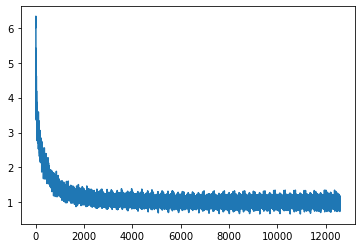

In [58]:
plt.plot(range(len(Losses)),Losses)

In [59]:
####### Can we save the weights ? Can we re-use this model once its trained?
model.layers

[{'w': array([[ 1.07265843, -0.24953783, -0.58047909, ..., -1.01137027,
          -0.50845155,  0.27866091],
         [-1.4289932 , -0.30613251, -0.41888657, ..., -0.72705435,
           0.18625012, -0.90923839],
         [-0.05877209, -0.38708646, -2.40609893, ..., -0.56962409,
           1.19891808, -0.67652335],
         ...,
         [ 1.36828668,  1.17415686,  1.29328901, ..., -0.3105896 ,
           2.56619427, -0.74358843],
         [-0.56347891, -1.79721072, -2.03606744, ...,  0.9861157 ,
          -0.8409872 ,  0.65371341],
         [ 0.85213012,  1.11691525,  0.29203748, ..., -0.71462272,
          -0.96166336, -0.72010062]]),
  'b': array([[ 0.38463228,  0.5682905 ,  1.72032345,  0.55706901, -0.72879952,
           2.40674927, -0.17778476, -0.0081334 ,  0.14103466, -1.94950523,
           0.03356564, -0.36195266,  0.52753984,  0.70417534,  0.79516764,
           1.13939076, -1.62153379, -1.87223389,  1.69057703, -0.11905019,
          -0.8864742 , -1.72235683,  0.33585854,  

In [60]:
import pickle
with open('data/weights.pkl', 'wb') as file:
    pickle.dump(model.layers,file)

In [61]:
with open('data/weights.pkl', 'rb') as file:
    wts=pickle.load(file)

In [62]:
wts

[{'w': array([[ 1.07265843, -0.24953783, -0.58047909, ..., -1.01137027,
          -0.50845155,  0.27866091],
         [-1.4289932 , -0.30613251, -0.41888657, ..., -0.72705435,
           0.18625012, -0.90923839],
         [-0.05877209, -0.38708646, -2.40609893, ..., -0.56962409,
           1.19891808, -0.67652335],
         ...,
         [ 1.36828668,  1.17415686,  1.29328901, ..., -0.3105896 ,
           2.56619427, -0.74358843],
         [-0.56347891, -1.79721072, -2.03606744, ...,  0.9861157 ,
          -0.8409872 ,  0.65371341],
         [ 0.85213012,  1.11691525,  0.29203748, ..., -0.71462272,
          -0.96166336, -0.72010062]]),
  'b': array([[ 0.38463228,  0.5682905 ,  1.72032345,  0.55706901, -0.72879952,
           2.40674927, -0.17778476, -0.0081334 ,  0.14103466, -1.94950523,
           0.03356564, -0.36195266,  0.52753984,  0.70417534,  0.79516764,
           1.13939076, -1.62153379, -1.87223389,  1.69057703, -0.11905019,
          -0.8864742 , -1.72235683,  0.33585854,  

In [63]:
##### Create a new model #######
mod_infer=MLP(784)
mod_infer.add_layer(30,"sigmoid")
mod_infer.add_layer(10,"softmax")

In [64]:
mod_infer.layers=wts

In [65]:
mod_infer.layers

[{'w': array([[ 1.07265843, -0.24953783, -0.58047909, ..., -1.01137027,
          -0.50845155,  0.27866091],
         [-1.4289932 , -0.30613251, -0.41888657, ..., -0.72705435,
           0.18625012, -0.90923839],
         [-0.05877209, -0.38708646, -2.40609893, ..., -0.56962409,
           1.19891808, -0.67652335],
         ...,
         [ 1.36828668,  1.17415686,  1.29328901, ..., -0.3105896 ,
           2.56619427, -0.74358843],
         [-0.56347891, -1.79721072, -2.03606744, ...,  0.9861157 ,
          -0.8409872 ,  0.65371341],
         [ 0.85213012,  1.11691525,  0.29203748, ..., -0.71462272,
          -0.96166336, -0.72010062]]),
  'b': array([[ 0.38463228,  0.5682905 ,  1.72032345,  0.55706901, -0.72879952,
           2.40674927, -0.17778476, -0.0081334 ,  0.14103466, -1.94950523,
           0.03356564, -0.36195266,  0.52753984,  0.70417534,  0.79516764,
           1.13939076, -1.62153379, -1.87223389,  1.69057703, -0.11905019,
          -0.8864742 , -1.72235683,  0.33585854,  

In [66]:
X_test=mnist_test.values

In [67]:
preds_test=mod_infer.forward(X_test)

/Users/gunnvantsaini/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [68]:
labels_test=preds_test.argmax(axis=1)

In [69]:
labels_test

array([2, 0, 9, ..., 3, 4, 4])

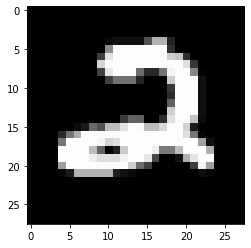

In [72]:
plt.imshow(mnist_test.iloc[0].values.reshape((28,28)),cmap="gray")

In [71]:
X_test.shape

(28000, 784)